# **NFL Big Data 2026 - Prediction | Análisis Detallado**

## **Objetivo de la Competencia**

La NFL ha diseñado una competencia nombrada "NFL Big Data 2026", cuyo objetivo es ayudar a entender el movimiento de los jugadores durante una jugada de pase, desde que la pelota es lanzada hasta el momento en que esta es atrapada o bien, se dicta incompleta la jugada. Desde la perspectiva de un equipo atacante, esta información es valiosa para entender la forma en la que transitan y responden al lanzamiento los jugadores defensivos, cuyo trabajo es interceptar el pase o prevenir al receptor designado, de alcanzar la pelota; así mismo, para la perspectiva del equipo ofensivo, esta información permite entender cómo el receptor designado construye su ruta hacia la pelota y qué variables adicionales la afectan por medio de su toma de decisiones, según el entorno. En definitiva, la competencia busca profundizar en la forma en la que se entiende el movimiento de los jugadores según su rol en una jugada.


## **Variables de Entrada/Salida**

En la Competencia de Predicción, los participantes son encomendados con la tarea de predecir el movimiento de un jugador mientras que la pelota está en el aire. Para ello, se proveen el siguiente conjunto de variables de entrada para la tarea en cuestión, antes de que el pase sea lanzado:

- `game_id`: Identificador Único de Partido (Numérica)
- `play_id`: Identificador de Jugada, no es único entre partidos; es decir, puede existir la jugada #4 en múltiples partidos (Numérica)
- `player_to_predict`: Indica si la predicción de las posiciones x/y serán tenidas en cuenta (Booleana)
- `nfl_id`: Identificador Numérico de Jugador, único para jugador (Numérica)
- `frame_id`: Identificador de fotograma para cada jugada, empieza en 1 para cada identificador de partido y jugada coordinados según archivo de entrada o salida game_id/play_id/file type (Numérica)
- `play_direction`: Dirección en la que los atacantes se están moviendo (Izquierda o Derecha)
- `absolute_yardline_number`: Distancia a la última yarda del equipo en posesión (Numérica)
- `player_name`: Nombre de Jugador (Texto)
- `player_height`: Altura del Jugador, es interesante revisar la transformación a variable de tipo numérica (Texto en ft-in)
- `player_weight`: Peso del Jugador (Numérica en lbs)
- `player_birth_date`: Fecha de Nacimiento, es interesante revisar la transformación a variable numérica que codifica la edad (Text en yyyy-mm-dd)
- `player_position`: La Posición del Jugador (Rol específico en el campo en el que normalmente juega) (Texto)
- `player_side`: Indica si el jugador está en el equipo defensor o atacante (Texto)
- `player_role`: Rol del Jugador en la Jugada (Cobertura Defensiva, Receptor Designado, Pasador ó Otros Corredores de Ruta)
- `x`: Posición del Jugador a lo largo del eje alargado del campo, generalmente entre 0 - 120 yardas (Numérica)
- `y`: Posición del Jugador a lo largo del eje corto del campo, generalmente entre 0 - 53.3 yardas (Numérica)
- `s`: Velocidad en yardas/segundo (Numérica)
- `a`: Aceleración en yardas/segundo^2 (Numérica)
- `o`: Orientación del Jugador en grados (Numérica)
- `dir`: Ángulo de Movimiento del Jugador en grados (Numérica)
- `num_frames_output`: Número de Fotogramas a predecir para el formato de salida game_id/play_id/nfl_id dado (Numérica)
- `ball_land_x`: Posición de Caída de la Pelota a lo largo del eje alargado del campo, generalmente entre 0 - 120 yardas (Numérica)
- `ball_land_y`: Posición de Caída de la Pelota a lo largo del eje corto del campo, generalmente entre 0 - 53.3 yardas (Numérica)

Luego, se proveen el siguiente conjunto de variables de salida para la tarea en cuestión, después de que el pase sea lanzado:

- `game_id`: Identificador Único de Partido (Numérica)
- `play_id`: Identificador de Jugada, no es único entre partidos; es decir, puede existir la jugada #4 en múltiples partidos (Numérica)
- `nfl_id`: Identificador Numérico de Jugador, único para jugador (Numérica)
- `frame_id`: Identificador de fotograma para cada jugada, empieza en 1 para cada identificador de partido y jugada coordinados según archivo de entrada o salida game_id/play_id/file type. El valor máximo de esta secuencia será igual al valor correspondiente de `num_frames_output` (Numérica)
- `x`: Posición del Jugador a lo largo del eje alargado del campo, generalmente entre 0 - 120 yardas (Numérica) [VARIABLE A PREDECIR]
- `y`: Posición del Jugador a lo largo del eje corto del campo, generalmente entre 0 - 53.3 yardas (Numérica) [VARIABLE A PREDECIR]



## **NOTA:** 

Es importante tener en cuenta que hay 10 fotogramas por segundo. Así, digamos que una jugada duró 3 segundos, entonces habrán 30 fotogramas que codifican la información de dicha jugada. 

De igual manera, los pases rápidos (duran menos de medio segundo), pases desviados y pases fuera del campo son obviados en la competencia.



# **Preparación de Aceleradores**

In [1]:
import cudf, cuml
import cupy as cp
print("cuDF version:", cudf.__version__)
print("cuML version:", cuml.__version__)
print("GPU available:", cp.cuda.runtime.getDeviceCount() > 0)

cuDF version: 25.02.02
cuML version: 25.02.01
GPU available: True


In [2]:
%load_ext cuml.accel
%load_ext cudf.pandas

[2025-10-15 12:58:35.763] [CUML] [info] cuML: Installed accelerator for sklearn.


2025-10-15 12:58:50.242124: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1760533130.405126      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1760533130.450084      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


[2025-10-15 12:59:06.749] [CUML] [info] cuML: Installed accelerator for umap.
[2025-10-15 12:59:06.822] [CUML] [info] cuML: Installed accelerator for hdbscan.
[2025-10-15 12:59:06.822] [CUML] [info] cuML: Successfully initialized accelerator.


/usr/local/lib/python3.11/dist-packages/cudf/pandas/__init__.py:65: UserWarning: cudf.pandas detected an already configured memory resource, ignoring 'CUDF_PANDAS_RMM_MODE'=managed_pool
  warnings.warn(


# **Código de Ayuda - Análisis de Datos Exploratorio Inicial**

A continuación, se presentan un par de celdas de código que proveen un código de ayuda para entender la forma de abordar la competencia de forma inicial y así mismo, que no será útil para hacer un análisis de datos exploratorio inicial con el fin de entender mejor cómo se comportan cada una de las variables, tanto por separado como entre ellas (Relaciones existentes aparentes).

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nfl-big-data-bowl-2026-prediction/sample_submission.csv
/kaggle/input/nfl-big-data-bowl-2026-prediction/test_input.csv
/kaggle/input/nfl-big-data-bowl-2026-prediction/test.csv
/kaggle/input/nfl-big-data-bowl-2026-prediction/train/input_2023_w17.csv
/kaggle/input/nfl-big-data-bowl-2026-prediction/train/output_2023_w05.csv
/kaggle/input/nfl-big-data-bowl-2026-prediction/train/output_2023_w10.csv
/kaggle/input/nfl-big-data-bowl-2026-prediction/train/input_2023_w03.csv
/kaggle/input/nfl-big-data-bowl-2026-prediction/train/output_2023_w18.csv
/kaggle/input/nfl-big-data-bowl-2026-prediction/train/input_2023_w05.csv
/kaggle/input/nfl-big-data-bowl-2026-prediction/train/output_2023_w11.csv
/kaggle/input/nfl-big-data-bowl-2026-prediction/train/output_2023_w12.csv
/kaggle/input/nfl-big-data-bowl-2026-prediction/train/output_2023_w16.csv
/kaggle/input/nfl-big-data-bowl-2026-prediction/train/output_2023_w06.csv
/kaggle/input/nfl-big-data-bowl-2026-prediction/train/input_2023_w18.csv


In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pickle
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
warnings.filterwarnings('ignore')

# ============================================================================
# GPU CONFIGURATION & OPTIMIZATION
# ============================================================================

def setup_gpu():
    """Configure GPU for optimal performance"""
    print("="*80)
    print("GPU CONFIGURATION")
    print("="*80)
    
    # Check available GPUs
    gpus = tf.config.list_physical_devices('GPU')
    print(f"\n🖥️  Available GPUs: {len(gpus)}")
    
    if gpus:
        try:
            # Enable memory growth (don't allocate all GPU memory at once)
            for gpu in gpus:
                tf.config.experimental.set_memory_growth(gpu, True)
                print(f"   ✓ GPU: {gpu.name} - Memory growth enabled")
            
            # Set GPU memory limit (optional - useful if sharing GPU)
            # tf.config.set_logical_device_configuration(
            #     gpus[0],
            #     [tf.config.LogicalDeviceConfiguration(memory_limit=4096)]  # 4GB
            # )
            
            # Use mixed precision for faster training
            policy = tf.keras.mixed_precision.Policy('mixed_float16')
            tf.keras.mixed_precision.set_global_policy(policy)
            print(f"   ✓ Mixed precision enabled: {policy.name}")
            
            logical_gpus = tf.config.list_logical_devices('GPU')
            print(f"   ✓ Logical GPUs: {len(logical_gpus)}")
            
        except RuntimeError as e:
            print(f"   ⚠️  GPU configuration error: {e}")
    else:
        print("   ⚠️  No GPU found - using CPU (training will be slower)")
    
    # Set TensorFlow options for better performance
    tf.config.optimizer.set_jit(True)  # XLA compilation
    print("   ✓ XLA (Accelerated Linear Algebra) enabled")
    
    print(f"\n📊 TensorFlow version: {tf.__version__}")
    print(f"📊 Keras version: {keras.__version__}")
    
    return len(gpus) > 0

# ============================================================================
# CONFIGURATION
# ============================================================================

CONFIG = {
    'sequence_length': 10,
    'max_frames_to_predict': 15,
    'batch_size': 256,  # Larger batch for GPU
    'epochs': 100,
    'learning_rate': 0.001,
    'validation_split': 0.2,
    'use_gpu': True,
}

# ============================================================================
# EVALUATION METRICS
# ============================================================================

def calculate_rmse(y_true, y_pred):
    """Calculate Root Mean Squared Error"""
    mse = np.mean((y_true - y_pred) ** 2)
    rmse = np.sqrt(mse)
    return rmse

def calculate_mae(y_true, y_pred):
    """Calculate Mean Absolute Error"""
    mae = np.mean(np.abs(y_true - y_pred))
    return mae

def calculate_euclidean_distance(y_true, y_pred):
    """Calculate Euclidean distance between predicted and actual positions"""
    distances = np.sqrt((y_true[:, 0] - y_pred[:, 0])**2 + 
                       (y_true[:, 1] - y_pred[:, 1])**2)
    return distances

def evaluate_predictions(y_true, y_pred, split_name="Validation"):
    """Comprehensive evaluation of predictions"""
    print("\n" + "="*80)
    print(f"📊 {split_name.upper()} SET EVALUATION")
    print("="*80)
    
    # Overall metrics
    x_rmse = calculate_rmse(y_true[:, 0], y_pred[:, 0])
    y_rmse = calculate_rmse(y_true[:, 1], y_pred[:, 1])
    
    x_mae = calculate_mae(y_true[:, 0], y_pred[:, 0])
    y_mae = calculate_mae(y_true[:, 1], y_pred[:, 1])
    
    # Euclidean distance
    distances = calculate_euclidean_distance(y_true, y_pred)
    mean_distance = np.mean(distances)
    median_distance = np.median(distances)
    
    print(f"\n🎯 POSITION ACCURACY:")
    print(f"   X-coordinate:")
    print(f"      RMSE: {x_rmse:.3f} yards")
    print(f"      MAE:  {x_mae:.3f} yards")
    
    print(f"\n   Y-coordinate:")
    print(f"      RMSE: {y_rmse:.3f} yards")
    print(f"      MAE:  {y_mae:.3f} yards")
    
    print(f"\n📏 EUCLIDEAN DISTANCE:")
    print(f"   Mean:   {mean_distance:.3f} yards")
    print(f"   Median: {median_distance:.3f} yards")
    print(f"   Std:    {np.std(distances):.3f} yards")
    print(f"   Min:    {np.min(distances):.3f} yards")
    print(f"   Max:    {np.max(distances):.3f} yards")
    
    # Percentiles
    print(f"\n📊 DISTANCE PERCENTILES:")
    for p in [25, 50, 75, 90, 95, 99]:
        print(f"   {p}th percentile: {np.percentile(distances, p):.3f} yards")
    
    # Accuracy buckets
    print(f"\n🎯 ACCURACY BUCKETS:")
    for threshold in [1, 2, 5, 10, 15, 20]:
        within = (distances <= threshold).sum()
        pct = 100 * within / len(distances)
        print(f"   Within {threshold:2d} yards: {within:6,} ({pct:5.2f}%)")
    
    metrics = {
        'x_rmse': x_rmse,
        'y_rmse': y_rmse,
        'x_mae': x_mae,
        'y_mae': y_mae,
        'mean_distance': mean_distance,
        'median_distance': median_distance,
        'distances': distances
    }
    
    return metrics

def plot_predictions(y_true, y_pred, split_name="Validation", save_path="predictions_plot.png"):
    """Visualize predictions vs actual"""
    
    fig = plt.figure(figsize=(20, 12))
    
    # 1. X predictions scatter
    ax1 = plt.subplot(2, 3, 1)
    ax1.scatter(y_true[:, 0], y_pred[:, 0], alpha=0.3, s=1)
    ax1.plot([0, 120], [0, 120], 'r--', linewidth=2)
    ax1.set_xlabel('Actual X (yards)', fontsize=12)
    ax1.set_ylabel('Predicted X (yards)', fontsize=12)
    ax1.set_title(f'{split_name} - X Coordinate', fontsize=14, fontweight='bold')
    ax1.grid(alpha=0.3)
    
    # 2. Y predictions scatter
    ax2 = plt.subplot(2, 3, 2)
    ax2.scatter(y_true[:, 1], y_pred[:, 1], alpha=0.3, s=1)
    ax2.plot([0, 53.3], [0, 53.3], 'r--', linewidth=2)
    ax2.set_xlabel('Actual Y (yards)', fontsize=12)
    ax2.set_ylabel('Predicted Y (yards)', fontsize=12)
    ax2.set_title(f'{split_name} - Y Coordinate', fontsize=14, fontweight='bold')
    ax2.grid(alpha=0.3)
    
    # 3. Error distribution
    ax3 = plt.subplot(2, 3, 3)
    distances = calculate_euclidean_distance(y_true, y_pred)
    ax3.hist(distances, bins=50, alpha=0.7, edgecolor='black')
    ax3.axvline(np.mean(distances), color='red', linestyle='--', 
                linewidth=2, label=f'Mean: {np.mean(distances):.2f}')
    ax3.set_xlabel('Euclidean Distance Error (yards)', fontsize=12)
    ax3.set_ylabel('Frequency', fontsize=12)
    ax3.set_title('Prediction Error Distribution', fontsize=14, fontweight='bold')
    ax3.legend()
    ax3.grid(alpha=0.3)
    
    # 4. X error distribution
    ax4 = plt.subplot(2, 3, 4)
    x_errors = y_true[:, 0] - y_pred[:, 0]
    ax4.hist(x_errors, bins=50, alpha=0.7, edgecolor='black', color='green')
    ax4.axvline(0, color='red', linestyle='--', linewidth=2)
    ax4.set_xlabel('X Error (yards)', fontsize=12)
    ax4.set_ylabel('Frequency', fontsize=12)
    ax4.set_title(f'X Error - Mean: {np.mean(x_errors):.3f}', fontsize=14, fontweight='bold')
    ax4.grid(alpha=0.3)
    
    # 5. Y error distribution
    ax5 = plt.subplot(2, 3, 5)
    y_errors = y_true[:, 1] - y_pred[:, 1]
    ax5.hist(y_errors, bins=50, alpha=0.7, edgecolor='black', color='orange')
    ax5.axvline(0, color='red', linestyle='--', linewidth=2)
    ax5.set_xlabel('Y Error (yards)', fontsize=12)
    ax5.set_ylabel('Frequency', fontsize=12)
    ax5.set_title(f'Y Error - Mean: {np.mean(y_errors):.3f}', fontsize=14, fontweight='bold')
    ax5.grid(alpha=0.3)
    
    # 6. Cumulative accuracy
    ax6 = plt.subplot(2, 3, 6)
    sorted_distances = np.sort(distances)
    cumulative = np.arange(1, len(sorted_distances) + 1) / len(sorted_distances) * 100
    ax6.plot(sorted_distances, cumulative, linewidth=2)
    ax6.set_xlabel('Distance Threshold (yards)', fontsize=12)
    ax6.set_ylabel('Cumulative % of Predictions', fontsize=12)
    ax6.set_title('Cumulative Accuracy Curve', fontsize=14, fontweight='bold')
    ax6.grid(alpha=0.3)
    
    # Add benchmarks
    for threshold in [5, 10, 15]:
        pct = (distances <= threshold).sum() / len(distances) * 100
        ax6.axvline(threshold, linestyle='--', alpha=0.5)
        ax6.text(threshold, pct, f'{pct:.1f}%', fontsize=10)
    
    plt.suptitle(f'{split_name} Set - Prediction Analysis', 
                 fontsize=16, fontweight='bold', y=0.995)
    plt.tight_layout()
    plt.savefig(save_path, dpi=150, bbox_inches='tight')
    print(f"\n✓ Saved plot: {save_path}")
    
    return fig

def plot_training_history(history, save_path="training_history.png"):
    """Plot training history"""
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Loss plot
    axes[0].plot(history.history['loss'], label='Training Loss', linewidth=2)
    axes[0].plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
    axes[0].set_xlabel('Epoch', fontsize=12)
    axes[0].set_ylabel('Loss (MSE)', fontsize=12)
    axes[0].set_title('Training and Validation Loss', fontsize=14, fontweight='bold')
    axes[0].legend()
    axes[0].grid(alpha=0.3)
    
    # MAE plot
    axes[1].plot(history.history['mae'], label='Training MAE', linewidth=2)
    axes[1].plot(history.history['val_mae'], label='Validation MAE', linewidth=2)
    axes[1].set_xlabel('Epoch', fontsize=12)
    axes[1].set_ylabel('MAE (yards)', fontsize=12)
    axes[1].set_title('Training and Validation MAE', fontsize=14, fontweight='bold')
    axes[1].legend()
    axes[1].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(save_path, dpi=150, bbox_inches='tight')
    print(f"✓ Saved plot: {save_path}")
    
    return fig

# ============================================================================
# IMPORT FUNCTIONS FROM ORIGINAL CODE
# ============================================================================

def parse_height(height_str):
    if pd.isna(height_str):
        return np.nan
    try:
        feet, inches = map(int, str(height_str).split('-'))
        return feet * 12 + inches
    except:
        return np.nan

def calculate_age(birth_date, reference_date='2023-09-01'):
    try:
        birth = pd.to_datetime(birth_date)
        ref = pd.to_datetime(reference_date)
        return (ref - birth).days / 365.25
    except:
        return np.nan

def load_training_data(data_path='/kaggle/input/nfl-big-data-bowl-2026-prediction/train'):
    print("\n" + "="*80)
    print("LOADING TRAINING DATA")
    print("="*80)
    
    all_data = []
    for week in range(1, 19):
        file_path = f'{data_path}/input_2023_w{week:02d}.csv'
        try:
            df = pd.read_csv(file_path)
            all_data.append(df)
            print(f"✓ Week {week:02d}: {len(df):,} rows | {df['play_id'].nunique():,} plays")
        except FileNotFoundError:
            print(f"✗ Week {week:02d}: File not found")
    
    train_df = pd.concat(all_data, ignore_index=True)
    print(f"\nTotal training data: {len(train_df):,} rows")
    print(f" Unique plays: {(train_df['game_id'].astype(str) + '_' + train_df['play_id'].astype(str)).nunique():,}")
    print(f"Players to predict: {train_df['player_to_predict'].sum():,}")
    
    return train_df

def load_test_data():
    print("\n" + "="*80)
    print("LOADING TEST DATA")
    print("="*80)
    
    test_input = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2026-prediction/test_input.csv')
    test_targets = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2026-prediction/test.csv')
    
    print(f"✓ Test input: {len(test_input):,} rows")
    print(f"✓ Test targets: {len(test_targets):,} predictions needed")
    
    return test_input, test_targets

def normalize_play_direction(df):
    df = df.copy()
    left_mask = df['play_direction'] == 'left'
    num_flipped = left_mask.sum()
    
    df.loc[left_mask, 'x'] = 120 - df.loc[left_mask, 'x']
    df.loc[left_mask, 'y'] = 53.3 - df.loc[left_mask, 'y']
    df.loc[left_mask, 'dir'] = (df.loc[left_mask, 'dir'] + 180) % 360
    df.loc[left_mask, 'o'] = (df.loc[left_mask, 'o'] + 180) % 360
    
    if 'ball_land_x' in df.columns:
        df.loc[left_mask, 'ball_land_x'] = 120 - df.loc[left_mask, 'ball_land_x']
        df.loc[left_mask, 'ball_land_y'] = 53.3 - df.loc[left_mask, 'ball_land_y']
    
    print(f"   Normalized {num_flipped:,} plays moving left → right")
    return df

def engineer_features(df):
    print("\n" + "="*80)
    print("FEATURE ENGINEERING")
    print("="*80)
    
    df = df.copy()
    
    print("✓ Computing velocity components (vx, vy)")
    df['vx'] = df['s'] * np.cos(np.radians(df['dir']))
    df['vy'] = df['s'] * np.sin(np.radians(df['dir']))
    
    print("✓ Computing orientation components (ox, oy)")
    df['ox'] = np.cos(np.radians(df['o']))
    df['oy'] = np.sin(np.radians(df['o']))
    
    if 'ball_land_x' in df.columns:
        print("✓ Computing ball landing features")
        df['dist_to_ball'] = np.sqrt(
            (df['x'] - df['ball_land_x'])**2 + 
            (df['y'] - df['ball_land_y'])**2
        )
        df['angle_to_ball'] = np.arctan2(
            df['ball_land_y'] - df['y'],
            df['ball_land_x'] - df['x']
        )
        df['vel_toward_ball'] = df['s'] * np.cos(np.radians(df['dir']) - df['angle_to_ball'])
    else:
        df['dist_to_ball'] = 0
        df['angle_to_ball'] = 0
        df['vel_toward_ball'] = 0
    
    print("✓ Computing field position features")
    df['dist_to_left_sideline'] = df['y']
    df['dist_to_right_sideline'] = 53.3 - df['y']
    df['dist_to_nearest_sideline'] = np.minimum(df['y'], 53.3 - df['y'])
    df['dist_to_endzone'] = 120 - df['x']
    
    print("✓ Processing player attributes")
    df['height_inches'] = df['player_height'].apply(parse_height)
    df['height_inches'] = df['height_inches'].fillna(df['height_inches'].median())
    
    df['player_age'] = df['player_birth_date'].apply(calculate_age)
    df['player_age'] = df['player_age'].fillna(df['player_age'].median())
    
    df['bmi'] = (df['player_weight'] * 703) / (df['height_inches'] ** 2)
    df['bmi'] = df['bmi'].fillna(df['bmi'].median())
    
    print("✓ Creating temporal features (lags, differences)")
    df = df.sort_values(['game_id', 'play_id', 'nfl_id', 'frame_id'])
    
    group_cols = ['game_id', 'play_id', 'nfl_id']
    for lag in [1, 2, 3]:
        for col in ['x', 'y', 's', 'a', 'vx', 'vy']:
            df[f'{col}_lag{lag}'] = df.groupby(group_cols)[col].shift(lag)
    
    df['speed_change'] = df.groupby(group_cols)['s'].diff()
    df['accel_change'] = df.groupby(group_cols)['a'].diff()
    df['dir_change'] = df.groupby(group_cols)['dir'].diff()
    
    df.loc[df['dir_change'] > 180, 'dir_change'] -= 360
    df.loc[df['dir_change'] < -180, 'dir_change'] += 360
    
    print("✓ Computing rolling statistics")
    for col in ['s', 'a']:
        df[f'{col}_roll_mean'] = df.groupby(group_cols)[col].transform(
            lambda x: x.rolling(window=3, min_periods=1).mean()
        )
        df[f'{col}_roll_std'] = df.groupby(group_cols)[col].transform(
            lambda x: x.rolling(window=3, min_periods=1).std()
        )
    
    df = df.fillna(method='bfill').fillna(method='ffill').fillna(0)
    
    print(f"\n📊 Features created: {len(df.columns)} total columns")
    
    return df

def encode_categorical(df, encoders=None):
    df = df.copy()
    categorical_cols = ['player_position', 'player_side', 'player_role']
    
    if encoders is None:
        encoders = {}
        for col in categorical_cols:
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col].astype(str))
            encoders[col] = le
        return df, encoders
    else:
        for col in categorical_cols:
            if col in encoders:
                df[col] = df[col].astype(str).map(
                    lambda x: x if x in encoders[col].classes_ else encoders[col].classes_[0]
                )
                df[col] = encoders[col].transform(df[col])
        return df

def create_sequences(df, sequence_length=10, for_training=True):
    print("\n" + "="*80)
    print("CREATING SEQUENCES")
    print("="*80)
    
    sequence_features = [
        'x', 'y', 's', 'a', 'vx', 'vy', 'ox', 'oy', 'dir', 'o',
        'x_lag1', 'y_lag1', 's_lag1', 'a_lag1',
        'x_lag2', 'y_lag2', 's_lag2', 'a_lag2',
        'x_lag3', 'y_lag3', 's_lag3', 'a_lag3',
        'speed_change', 'accel_change', 'dir_change',
        's_roll_mean', 'a_roll_mean',
        'dist_to_left_sideline', 'dist_to_right_sideline', 'dist_to_nearest_sideline'
    ]
    
    static_features = [
        'player_position', 'player_side', 'player_role',
        'height_inches', 'player_weight', 'player_age', 'bmi',
        'absolute_yardline_number', 'dist_to_ball', 'angle_to_ball'
    ]
    
    sequences = []
    static_data = []
    targets = []
    metadata = []
    
    grouped = df.groupby(['game_id', 'play_id', 'nfl_id'])
    
    for (game_id, play_id, nfl_id), group in grouped:
        if for_training and not group['player_to_predict'].any():
            continue
        
        group = group.sort_values('frame_id')
        
        if len(group) < sequence_length:
            continue
        
        seq_data = group[sequence_features].iloc[-sequence_length:].values
        static = group[static_features].iloc[-1].values
        
        sequences.append(seq_data)
        static_data.append(static)
        
        if for_training and 'ball_land_x' in group.columns:
            target_x = group['ball_land_x'].iloc[-1]
            target_y = group['ball_land_y'].iloc[-1]
            targets.append([target_x, target_y])
        
        metadata.append({
            'game_id': game_id,
            'play_id': play_id,
            'nfl_id': nfl_id,
            'num_frames_output': group['num_frames_output'].iloc[-1] if 'num_frames_output' in group.columns else 0,
            'last_x': group['x'].iloc[-1],
            'last_y': group['y'].iloc[-1],
        })
    
    sequences = np.array(sequences, dtype=np.float32)
    static_data = np.array(static_data, dtype=np.float32)
    
    if for_training and len(targets) > 0:
        targets = np.array(targets, dtype=np.float32)
    else:
        targets = None
    
    print(f"✓ Created {len(sequences):,} sequences")
    print(f"✓ Sequence shape: {sequences.shape}")
    print(f"✓ Static shape: {static_data.shape}")
    if targets is not None:
        print(f"✓ Target shape: {targets.shape}")
    
    return sequences, static_data, targets, metadata

def build_model(sequence_shape, static_shape):
    print("\n" + "="*80)
    print("BUILDING MODEL")
    print("="*80)
    
    sequence_input = layers.Input(shape=sequence_shape, name='sequence_input')
    
    x = layers.LSTM(128, return_sequences=True)(sequence_input)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)
    
    x = layers.LSTM(64, return_sequences=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)
    
    static_input = layers.Input(shape=(static_shape,), name='static_input')
    s = layers.Dense(64, activation='relu')(static_input)
    s = layers.BatchNormalization()(s)
    s = layers.Dropout(0.2)(s)
    s = layers.Dense(32, activation='relu')(s)
    
    combined = layers.concatenate([x, s])
    
    z = layers.Dense(128, activation='relu')(combined)
    z = layers.BatchNormalization()(z)
    z = layers.Dropout(0.3)(z)
    
    z = layers.Dense(64, activation='relu')(z)
    z = layers.Dropout(0.2)(z)
    
    # For mixed precision, use float32 output
    output = layers.Dense(2, dtype='float32', name='position_output')(z)
    
    model = keras.Model(
        inputs=[sequence_input, static_input],
        outputs=output
    )
    
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=CONFIG['learning_rate']),
        loss='mse',
        metrics=['mae', 'mse']
    )
    
    model.summary()
    
    return model

def train_model(model, X_seq, X_static, y, validation_split=0.15):
    print("\n" + "="*80)
    print("TRAINING MODEL")
    print("="*80)
    
    callbacks = [
        keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=15,
            restore_best_weights=True,
            verbose=1
        ),
        keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.5,
            patience=7,
            min_lr=1e-6,
            verbose=1
        ),
        keras.callbacks.ModelCheckpoint(
            'best_model.keras',
            monitor='val_loss',
            save_best_only=True,
            verbose=1
        )
    ]
    
    history = model.fit(
        [X_seq, X_static], y,
        batch_size=CONFIG['batch_size'],
        epochs=CONFIG['epochs'],
        validation_split=validation_split,
        callbacks=callbacks,
        verbose=1
    )
    
    return model, history

def create_submission(model, test_input, test_targets, metadata_lookup, scalers):
    print("\n" + "="*80)
    print("GENERATING PREDICTIONS")
    print("="*80)
    
    pred_dict = {}
    for meta, pred in zip(metadata_lookup, model.predict([test_input[0], test_input[1]], verbose=1)):
        key = (meta['game_id'], meta['play_id'], meta['nfl_id'])
        pred_dict[key] = {
            'x': pred[0],
            'y': pred[1],
            'last_x': meta['last_x'],
            'last_y': meta['last_y']
        }
    
    submissions = []
    for _, row in test_targets.iterrows():
        key = (row['game_id'], row['play_id'], row['nfl_id'])
        
        if key in pred_dict:
            x_pred = pred_dict[key]['x']
            y_pred = pred_dict[key]['y']
        else:
            x_pred = 60.0
            y_pred = 26.65
        
        submissions.append({
            'id': f"{row['game_id']}_{row['play_id']}_{row['nfl_id']}_{row['frame_id']}",
            'x': x_pred,
            'y': y_pred
        })
    
    submission_df = pd.DataFrame(submissions)
    submission_df.to_csv('submission.csv', index=False)
    
    print(f"✓ Submission created: {len(submission_df):,} predictions")
    print(f"✓ Saved to: submission.csv")
    
    return submission_df

# ============================================================================
# MAIN PIPELINE WITH EVALUATION
# ============================================================================

def main():
    start_time = datetime.now()
    
    print("\n" + "="*80)
    print(" NFL BIG DATA BOWL 2026 - ENHANCED PIPELINE WITH EVALUATION")
    print("="*80)
    
    # Setup GPU
    has_gpu = setup_gpu()
    
    # Load data
    train_df = load_training_data()
    test_input_df, test_targets_df = load_test_data()
    
    # Preprocess
    print("\n📍 Step 1: Normalizing play direction...")
    train_df = normalize_play_direction(train_df)
    test_input_df = normalize_play_direction(test_input_df)
    
    # Feature engineering
    print("\n📍 Step 2: Feature engineering...")
    train_df = engineer_features(train_df)
    test_input_df = engineer_features(test_input_df)
    
    # Encode categorical
    print("\n📍 Step 3: Encoding categorical variables...")
    train_df, encoders = encode_categorical(train_df)
    test_input_df = encode_categorical(test_input_df, encoders)
    
    # Create sequences
    print("\n📍 Step 4: Creating sequences...")
    X_seq_all, X_static_all, y_all, metadata_all = create_sequences(
        train_df, CONFIG['sequence_length'], for_training=True
    )
    
    X_seq_test, X_static_test, _, metadata_test = create_sequences(
        test_input_df, CONFIG['sequence_length'], for_training=False
    )
    
    # Split train/validation
    print("\n📍 Step 5: Splitting train/validation...")
    n_samples = len(X_seq_all)
    n_val = int(n_samples * CONFIG['validation_split'])
    
    # Random shuffle
    indices = np.random.permutation(n_samples)
    train_idx = indices[n_val:]
    val_idx = indices[:n_val]
    
    X_seq_train = X_seq_all[train_idx]
    X_static_train = X_static_all[train_idx]
    y_train = y_all[train_idx]
    
    X_seq_val = X_seq_all[val_idx]
    X_static_val = X_static_all[val_idx]
    y_val = y_all[val_idx]
    
    print(f"   Training samples: {len(X_seq_train):,}")
    print(f"   Validation samples: {len(X_seq_val):,}")
    
    # Scale features
    print("\n📍 Step 6: Scaling features...")
    scaler_seq = StandardScaler()
    scaler_static = StandardScaler()
    
    # Scale sequence features
    X_seq_train_flat = X_seq_train.reshape(-1, X_seq_train.shape[-1])
    X_seq_train_scaled = scaler_seq.fit_transform(X_seq_train_flat).reshape(X_seq_train.shape)
    
    X_seq_val_flat = X_seq_val.reshape(-1, X_seq_val.shape[-1])
    X_seq_val_scaled = scaler_seq.transform(X_seq_val_flat).reshape(X_seq_val.shape)
    
    # Scale static features
    X_static_train_scaled = scaler_static.fit_transform(X_static_train)
    X_static_val_scaled = scaler_static.transform(X_static_val)
    
    # Scale test features
    X_seq_test_flat = X_seq_test.reshape(-1, X_seq_test.shape[-1])
    X_seq_test_scaled = scaler_seq.transform(X_seq_test_flat).reshape(X_seq_test.shape)
    X_static_test_scaled = scaler_static.transform(X_static_test)
    
    # Build model
    print("\n📍 Step 7: Building model...")
    model = build_model(
        sequence_shape=(X_seq_train.shape[1], X_seq_train.shape[2]),
        static_shape=X_static_train.shape[1]
    )
    
    # Train model WITHOUT validation_split (we already split)
    print("\n📍 Step 8: Training model...")
    
    callbacks = [
        keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=15,
            restore_best_weights=True,
            verbose=1
        ),
        keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.5,
            patience=7,
            min_lr=1e-6,
            verbose=1
        ),
        keras.callbacks.ModelCheckpoint(
            'best_model.keras',
            monitor='val_loss',
            save_best_only=True,
            verbose=1
        )
    ]
    
    history = model.fit(
        [X_seq_train_scaled, X_static_train_scaled], y_train,
        validation_data=([X_seq_val_scaled, X_static_val_scaled], y_val),
        batch_size=CONFIG['batch_size'],
        epochs=CONFIG['epochs'],
        callbacks=callbacks,
        verbose=1
    )
    
    # Plot training history
    print("\n📍 Step 9: Plotting training history...")
    plot_training_history(history, "training_history.png")
    
    # Evaluate on training set
    print("\n📍 Step 10: Evaluating on training set...")
    y_train_pred = model.predict([X_seq_train_scaled, X_static_train_scaled], verbose=0)
    train_metrics = evaluate_predictions(y_train, y_train_pred, "Training")
    plot_predictions(y_train, y_train_pred, "Training", "predictions_train.png")
    
    # Evaluate on validation set
    print("\n📍 Step 11: Evaluating on validation set...")
    y_val_pred = model.predict([X_seq_val_scaled, X_static_val_scaled], verbose=0)
    val_metrics = evaluate_predictions(y_val, y_val_pred, "Validation")
    plot_predictions(y_val, y_val_pred, "Validation", "predictions_val.png")
    
    # Save model and artifacts
    print("\n📍 Step 12: Saving model and artifacts...")
    model.save('nfl_model_final.keras')
    with open('scalers.pkl', 'wb') as f:
        pickle.dump({'seq': scaler_seq, 'static': scaler_static, 'encoders': encoders}, f)
    
    # Save metrics to file
    metrics_summary = {
        'training': {
            'x_rmse': float(train_metrics['x_rmse']),
            'y_rmse': float(train_metrics['y_rmse']),
            'x_mae': float(train_metrics['x_mae']),
            'y_mae': float(train_metrics['y_mae']),
            'mean_distance': float(train_metrics['mean_distance']),
            'median_distance': float(train_metrics['median_distance'])
        },
        'validation': {
            'x_rmse': float(val_metrics['x_rmse']),
            'y_rmse': float(val_metrics['y_rmse']),
            'x_mae': float(val_metrics['x_mae']),
            'y_mae': float(val_metrics['y_mae']),
            'mean_distance': float(val_metrics['mean_distance']),
            'median_distance': float(val_metrics['median_distance'])
        }
    }
    
    with open('metrics.pkl', 'wb') as f:
        pickle.dump(metrics_summary, f)
    
    # Create submission
    print("\n📍 Step 13: Creating submission...")
    submission = create_submission(
        model, 
        (X_seq_test_scaled, X_static_test_scaled),
        test_targets_df,
        metadata_test,
        {'seq': scaler_seq, 'static': scaler_static}
    )
    
    # Final summary
    end_time = datetime.now()
    duration = end_time - start_time
    
    print("\n" + "="*80)
    print("✅ PIPELINE COMPLETE!")
    print("="*80)
    
    print(f"\n⏱️  Total Time: {duration}")
    
    print(f"\n📁 Files created:")
    print(f"   • nfl_model_final.keras - Trained model")
    print(f"   • best_model.keras - Best model checkpoint")
    print(f"   • scalers.pkl - Feature scalers and encoders")
    print(f"   • metrics.pkl - Evaluation metrics")
    print(f"   • submission.csv - Final predictions ({len(submission):,} rows)")
    print(f"   • training_history.png - Training curves")
    print(f"   • predictions_train.png - Training set predictions")
    print(f"   • predictions_val.png - Validation set predictions")
    
    print(f"\n📊 FINAL RESULTS:")
    print(f"\n   Training Set:")
    print(f"      RMSE (X): {train_metrics['x_rmse']:.3f} yards")
    print(f"      RMSE (Y): {train_metrics['y_rmse']:.3f} yards")
    print(f"      Mean Distance Error: {train_metrics['mean_distance']:.3f} yards")
    
    print(f"\n   Validation Set:")
    print(f"      RMSE (X): {val_metrics['x_rmse']:.3f} yards")
    print(f"      RMSE (Y): {val_metrics['y_rmse']:.3f} yards")
    print(f"      Mean Distance Error: {val_metrics['mean_distance']:.3f} yards")
    
    print(f"\n🎯 Model Performance Summary:")
    within_5_val = (val_metrics['distances'] <= 5).sum() / len(val_metrics['distances']) * 100
    within_10_val = (val_metrics['distances'] <= 10).sum() / len(val_metrics['distances']) * 100
    print(f"   Predictions within 5 yards: {within_5_val:.1f}%")
    print(f"   Predictions within 10 yards: {within_10_val:.1f}%")
    
    print("\n" + "="*80)
    
    return model, history, submission, train_metrics, val_metrics

# ============================================================================
# RUN
# ============================================================================

#if __name__ == "__main__":
    #model, history, submission, train_metrics, val_metrics = main()

# **Análisis de Datos Exploratorio Inicial**

## **Carga de Datos**

In [5]:
# Carga de Datos
train_df = load_training_data()
test_input_df, test_targets_df = load_test_data()


LOADING TRAINING DATA
✓ Week 01: 285,714 rows | 748 plays
✓ Week 02: 288,586 rows | 777 plays
✓ Week 03: 297,757 rows | 823 plays
✓ Week 04: 272,475 rows | 710 plays
✓ Week 05: 254,779 rows | 677 plays
✓ Week 06: 270,676 rows | 715 plays
✓ Week 07: 233,597 rows | 646 plays
✓ Week 08: 281,011 rows | 765 plays
✓ Week 09: 252,796 rows | 656 plays
✓ Week 10: 260,372 rows | 673 plays
✓ Week 11: 243,413 rows | 657 plays
✓ Week 12: 294,940 rows | 755 plays
✓ Week 13: 233,755 rows | 622 plays
✓ Week 14: 279,972 rows | 738 plays
✓ Week 15: 281,820 rows | 702 plays
✓ Week 16: 316,417 rows | 822 plays
✓ Week 17: 277,582 rows | 734 plays
✓ Week 18: 254,917 rows | 686 plays

Total training data: 4,880,579 rows
 Unique plays: 14,108
Players to predict: 1,303,440

LOADING TEST DATA
✓ Test input: 49,753 rows
✓ Test targets: 5,837 predictions needed


## **Tamaño del Dataset, Tipo de Datos y Primeras Observaciones**

In [17]:
# Tamaño de Dataset
print("Train shape:", train_df.shape)
print("Test shape:", test_input_df.shape)

# Revisión de Datos Faltantes
missing = train_df.isna().sum().sort_values(ascending=False)
percent_missing = (missing / len(train_df)) * 100
display(pd.DataFrame({'missing': missing, 'pct_missing': percent_missing}))

display(train_df.info())        # Nombre de Variables y Tipo de Datos
display(train_df.describe().T)  # Muestreo Estadístico Inicial de Variables

Train shape: (4880579, 23)
Test shape: (49753, 23)


missing  pct_missing
game_id                         0          0.0
play_id                         0          0.0
player_to_predict               0          0.0
nfl_id                          0          0.0
frame_id                        0          0.0
play_direction                  0          0.0
absolute_yardline_number        0          0.0
player_name                     0          0.0
player_height                   0          0.0
player_weight                   0          0.0
player_birth_date               0          0.0
player_position                 0          0.0
player_side                     0          0.0
player_role                     0          0.0
x                               0          0.0
y                               0          0.0
s                               0          0.0
a                               0          0.0
dir                             0          0.0
o                               0          0.0
num_frames_output               0          0.0
ball_land_x                     0          0.0
ball_land_y                     0          0.0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4880579 entries, 0 to 4880578
Data columns (total 23 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   game_id                   int64  
 1   play_id                   int64  
 2   player_to_predict         bool   
 3   nfl_id                    int64  
 4   frame_id                  int64  
 5   play_direction            object 
 6   absolute_yardline_number  int64  
 7   player_name               object 
 8   player_height             object 
 9   player_weight             int64  
 10  player_birth_date         object 
 11  player_position           object 
 12  player_side               object 
 13  player_role               object 
 14  x                         float64
 15  y                         float64
 16  s                         float64
 17  a                         float64
 18  dir                       float64
 19  o                         float64
 20  num_frames_output       

None

count          mean            std  \
game_id                   4880579.0  2.023155e+09  201140.466847   
play_id                   4880579.0  2.196409e+03    1246.426122   
nfl_id                    4880579.0  4.955890e+04    5210.337609   
frame_id                  4880579.0  1.613179e+01      11.130079   
absolute_yardline_number  4880579.0  6.055045e+01      23.059354   
player_weight             4880579.0  2.112783e+02      22.177471   
x                         4880579.0  6.050074e+01      23.489191   
y                         4880579.0  2.681190e+01      10.006199   
s                         4880579.0  3.019878e+00       2.227939   
a                         4880579.0  2.118335e+00       1.415794   
dir                       4880579.0  1.804972e+02     100.716153   
o                         4880579.0  1.815366e+02      98.009122   
num_frames_output         4880579.0  1.164147e+01       5.331537   
ball_land_x               4880579.0  6.051581e+01      25.296428   
ball_land_y               4880579.0  2.663766e+01      15.438138   

                                   min           25%           50%  \
game_id                   2.023091e+09  2.023101e+09  2.023111e+09   
play_id                   5.400000e+01  1.150000e+03  2.171000e+03   
nfl_id                    3.084200e+04  4.519800e+04  5.241300e+04   
frame_id                  1.000000e+00  8.000000e+00  1.500000e+01   
absolute_yardline_number  1.100000e+01  4.100000e+01  6.100000e+01   
player_weight             1.530000e+02  1.950000e+02  2.070000e+02   
x                         4.100000e-01  4.263000e+01  6.041000e+01   
y                         6.200000e-01  1.899000e+01  2.685000e+01   
s                         0.000000e+00  1.090000e+00  2.720000e+00   
a                         0.000000e+00  1.010000e+00  1.920000e+00   
dir                       0.000000e+00  9.091000e+01  1.795600e+02   
o                         0.000000e+00  9.174000e+01  1.801400e+02   
num_frames_output         5.000000e+00  8.000000e+00  1.000000e+01   
ball_land_x              -5.260000e+00  4.261000e+01  6.051000e+01   
ball_land_y              -3.910000e+00  1.330000e+01  2.647000e+01   

                                   75%           max  
game_id                   2.023121e+09  2.024011e+09  
play_id                   3.246000e+03  5.258000e+03  
nfl_id                    5.450000e+04  5.667300e+04  
frame_id                  2.200000e+01  1.230000e+02  
absolute_yardline_number  8.000000e+01  1.090000e+02  
player_weight             2.250000e+02  3.580000e+02  
x                         7.823000e+01  1.198600e+02  
y                         3.462000e+01  5.288000e+01  
s                         4.620000e+00  1.253000e+01  
a                         3.040000e+00  1.712000e+01  
dir                       2.708300e+02  3.600000e+02  
o                         2.715800e+02  3.600000e+02  
num_frames_output         1.400000e+01  9.400000e+01  
ball_land_x               7.847000e+01  1.258500e+02  
ball_land_y               3.987000e+01  5.733000e+01

**Tamaño de Dataset**

Vemos que el dataset es muy extenso, así, es posible que la implementación de modelos que posean alta complejidad computacional como SVR, KernelRidge o GaussianProcessRegressor tomen muchísimo tiempo de entrenamiento. De entrada, es completamente aceptable concluir que las implementaciones que proveen scikit-learn y cuML de los dos últimos son imposibles de implementar para este dataset usando un conjunto crudo de datos (aprox. 5M de Muestras); para ello, se debe hacer uso de métodos variacionales que proveen aproximaciones a la matriz de Kernel o bien, realizar un muestreo estratificado de las variables de entrenamiento y seleccionar una muestra de tamaño adecuado para el ejercicio de computación, sin embargo, este último método deja en duda la capacidad de generalización del algoritmo, ya que se debe reducir el tamaño del conjunto de entrenamiento al menos 100 veces (aprox. 30K - 50K muestras), sin saber de verdad qué tan representativa sea dicha muestra, a pesar del proceso de estratificación previo, ya que no conocemos ni siquiera aproximada la forma de las distribuciones de variables ni la relación entre ellas.


**Datos Faltantes**

La competencia nos provee un dataset depurado en cuanto a valores faltantes concierne, no habrá que implementar estrategias de imputación de datos posteriormente.


**Matriz de Estadísticos Básicos**

Si bien, la matriz de estadísticos básicos puede dar información útil. Es más adecuado realizar un análisis sobre medidas adicionales de dispersión, sesgo y concentración de los datos, así, se proponen las siguientes medidas que proveen de la siguiente información pertinente:

- **Diferencia entre media y mediana (asimetría central):** Si este valor es aproximadamente igual a cero, la distribución de la variable está centrada, de lo contrario, un valor positivo o negativo provee información sobre la existencia de un sesgo hacia la izquierda o hacia la derecha, respectivamente.
- **Coeficiente de variación (dispersión relativa):** Calcula la relación entre la desviación estándar y la media de los datos, así es posible medir la dispersión o bien, la concentración de los datos respecto a la media.
- **Proporción de desviación estándar frente al rango:** Calcula la relación entre la desviación estándar y el rango de los datos, esta métrica complementa el análisis de la dispersión relativa frente a la media para medir la dispersión total de los datos.
- **Rango intercuartílico (IQR) y su proporción respecto al rango total:** Permite calcular cuál es la proporción del rango de los datos que contiene la mitad de los mismos, centrados en la mediana.
- **Skewness (sesgo) y Kurtosis (curtosis):** Permiten determinar la presencia de colas sesgadas en la distribución de los datos y la magnitud de las mismas.

In [18]:
num_cols = train_df.select_dtypes(include='number').columns
desc_old = train_df.describe().T
desc_new = pd.DataFrame()

# Rango
desc_new["range"] = desc_old["max"] - desc_old["min"]

# Diferencia media-mediana
desc_new["mean_median_diff"] = desc_old["mean"] - desc_old["50%"]
desc_new["mean_median_ratio"] = desc_old["mean"] / desc_old["50%"]

# Coeficiente de variación
desc_new["cv"] = desc_old["std"] / desc_old["mean"]

# Desviación estándar respecto al rango
desc_new["std_to_range"] = desc_old["std"] / desc_new["range"]

# IQR y proporción al rango
desc_new["iqr"] = desc_old["75%"] - desc_old["25%"]
desc_new["iqr_to_range"] = desc_new["iqr"] / desc_new["range"]

# Skewness y Kurtosis
desc_new["skew"] = train_df[num_cols].skew()
desc_new["kurtosis"] = train_df[num_cols].kurtosis()

# Mostrar las 10 variables más asimétricas
desc_sorted = desc_new.sort_values(by="mean_median_diff", key=abs, ascending=False)
display(desc_sorted)

range  mean_median_diff  mean_median_ratio  \
game_id                   920013.000000      44212.126077           1.000022   
nfl_id                     25831.000000      -2854.096781           0.945546   
play_id                     5204.000000         25.408924           1.011704   
player_weight                205.000000          4.278286           1.020668   
num_frames_output             89.000000          1.641470           1.164147   
o                            360.000000          1.396618           1.007753   
frame_id                     122.000000          1.131788           1.075453   
dir                          360.000000          0.937185           1.005219   
absolute_yardline_number      98.000000         -0.449548           0.992630   
s                             12.530000          0.299878           1.110249   
a                             17.120000          0.198335           1.103299   
ball_land_y                   61.240002          0.167665           1.006334   
x                            119.450000          0.090736           1.001502   
y                             52.260000         -0.038105           0.998581   
ball_land_x                  131.109999          0.005812           1.000096   

                                cv  std_to_range           iqr  iqr_to_range  \
game_id                   0.000099      0.218628  20207.000000      0.021964   
nfl_id                    0.105134      0.201709   9302.000000      0.360110   
play_id                   0.567484      0.239513   2096.000000      0.402767   
player_weight             0.104968      0.108183     30.000000      0.146341   
num_frames_output         0.457978      0.059905      6.000000      0.067416   
o                         0.539886      0.272248    179.840000      0.499556   
frame_id                  0.689947      0.091230     14.000000      0.114754   
dir                       0.557993      0.279767    179.920000      0.499778   
absolute_yardline_number  0.380829      0.235300     39.000000      0.397959   
s                         0.737758      0.177808      3.530000      0.281724   
a                         0.668352      0.082698      2.030000      0.118575   
ball_land_y               0.579560      0.252092     26.569999      0.433867   
x                         0.388246      0.196645     35.600000      0.298033   
y                         0.373200      0.191470     15.630000      0.299082   
ball_land_x               0.418014      0.192940     35.860001      0.273511   

                              skew   kurtosis  
game_id                   4.005671  14.103189  
nfl_id                   -0.439786  -0.904682  
play_id                   0.033675  -1.099348  
player_weight             0.621690   0.368460  
num_frames_output         1.781374   6.301492  
o                        -0.002102  -1.416443  
frame_id                  1.202801   2.907938  
dir                      -0.000268  -1.300016  
absolute_yardline_number -0.001221  -0.932254  
s                         0.489582  -0.698358  
a                         0.636017   0.032648  
ball_land_y               0.009048  -1.226660  
x                         0.012997  -0.668632  
y                        -0.004670  -0.790100  
ball_land_x               0.009086  -0.434396

**Discusión - Resultados de Dispersión, Sesgo y Concentración**

- `player_weight`, `num_frames_output`, `frame_id`, `s` y `a` sugieren presencia de colas pesadas hacia la derecha.
- Todas las variables a excepción de `o` y `dir` indican niveles considerables de dispersión.

Comprobemos estas tendencias de forma específica con un análisis visual a continuación

## **Visualización de las Distribuciones de Variables Numéricas**

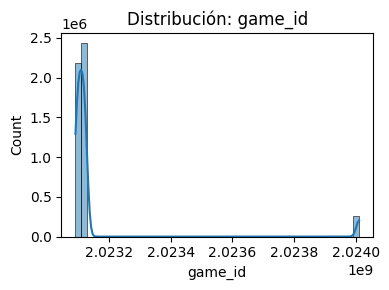

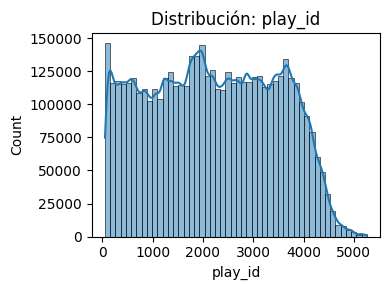

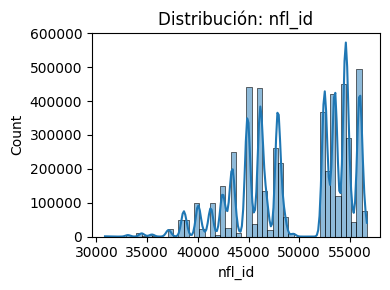

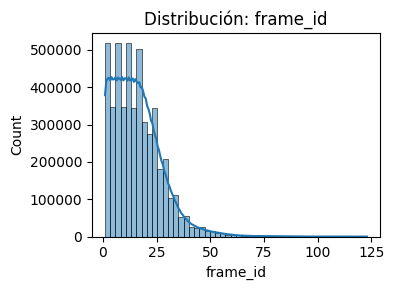

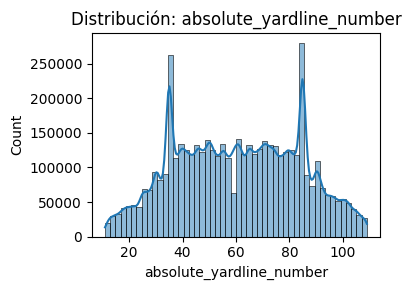

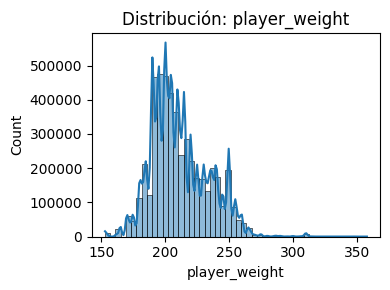

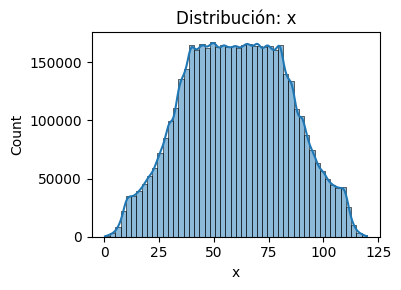

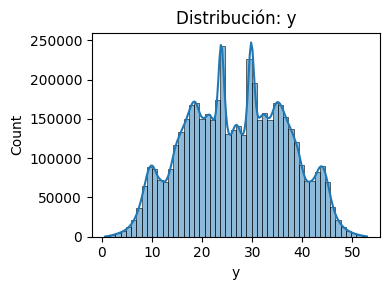

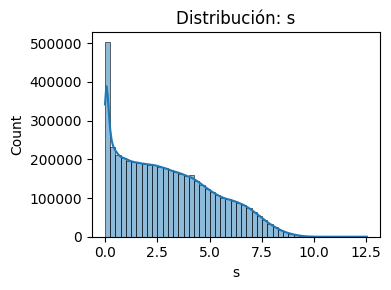

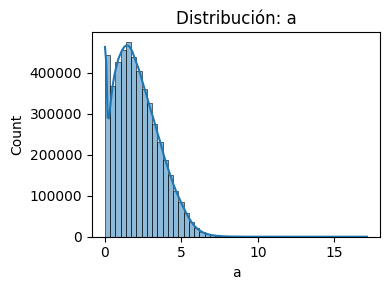

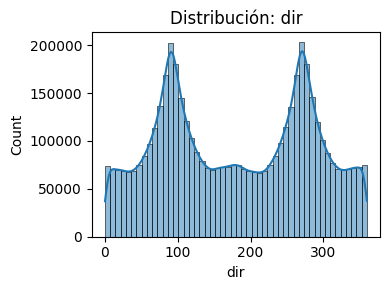

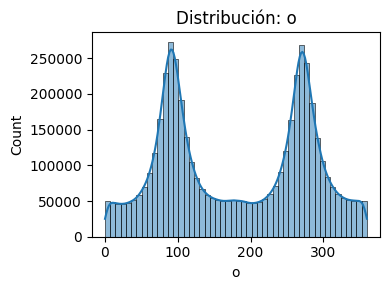

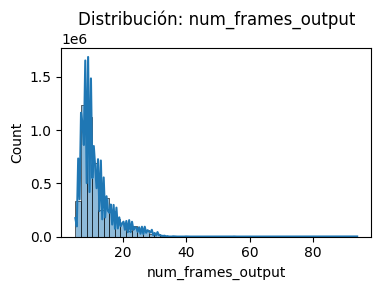

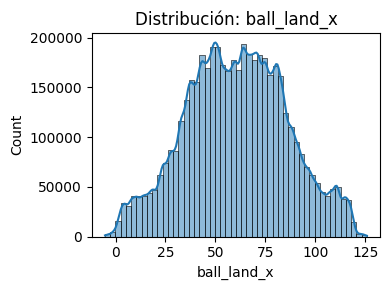

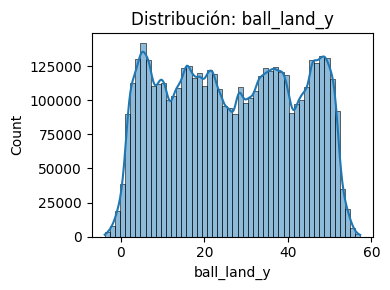

In [8]:
num_cols = train_df.select_dtypes(include='number').columns
for col in num_cols:
    plt.figure(figsize=(4,3))
    sns.histplot(train_df[col].dropna(), kde=True, bins=50)
    plt.title(f"Distribución: {col}")
    plt.tight_layout()
    plt.show()



**Discusión - Características de Distribuciones de Variables Numéricas**

- `game_id`: Se diferencia dos picos, correspondientes a la fase regular del campeonato que empezó en Septiembre de 2023 y adicionalmente, la fase final y Super Bowl que ocurre en Enero de 2024.
- `play_id`: Se evidencia una distribución aproximadamente uniforme, hasta el área de máximos donde se construye una cola. Esto es indicador de la distribución de la cantidad de jugadas por partido y cómo aparentemente la mayoría de partidos contienen un número semejante de jugadas realizadas.
- `nfl_id`: Esta variable no tiene una distribución paramétrica, se evidencia muchos datos extremos, podría ser un indicador de la existencia de jugadores selectos de alto impacto y rendimiento sostenido a lo largo de la temporada, las cuales son partícipes en un gran número de jugadas por partido.
- `frame_id y num_frames_output`: Tienen una distribución semejante con una alta concentración de datos alrededor de la media y una cola a la izquierda que indica qué muchas de las jugadas tienen una duración similar a excepción de ciertas jugadas con mayor duración.
- `absolute_yardline_number`: Aparenta una gaussiana bimodal, lo cual puede considerarse una consecuencia directa de que el conjunto de datos no presenta una dirección normalizada de ataque o defensa en los patrones de jugadas, por tanto, es normal que los dos picos representan las posiciones medias de los equipos en ataque a ambos lados del campo con una tendencia hacia los cuartos de cancha.
- `x`: Distribución aproximadamente normal con colas pequeñas, indicador de la presencia aproximadamente uniforme de jugadores sobre el Eje X del campo con una disminución paulatina de dicha presencia hacia las zonas límite o muertas.
- `y`: Distribución no parámetrica con picos espejo o bimodales, esto podría sugerir la aparición de carriles de tránsito comunes a lo largo del Eje X que parten desde el centro del Eje Y.
- `ball_land_x`: Distribución aproximadamente normal, acompaña el análisis realizado respecto a la variable `x`.
- `ball_land_y`: Distribución aproximadamente uniforme con la presencia de dos grupos de picos espejo, acompaña el análisis realizado respecto a la variable `y`.
- `s` y `a`: Velocidad en yardas/segundo (Numérica)
- `o` y `dir`: Presentan dos picos aparecen debido a que las jugadas de ataque significan la mayoría de las veces, en cierto avance de la pelota respecto al centro del campo en paralelo al eje X y esto acompañado al hecho de existen jugadas en ambos sentidos del campo, explica la forma de la distribución.

## **Visualización de la Distribución de Variables Categóricas (Conteo y Proporciones)**

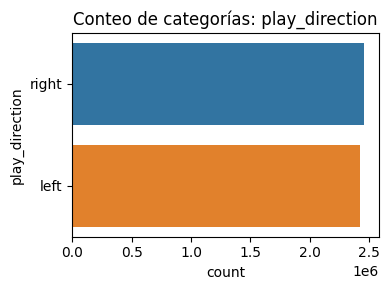

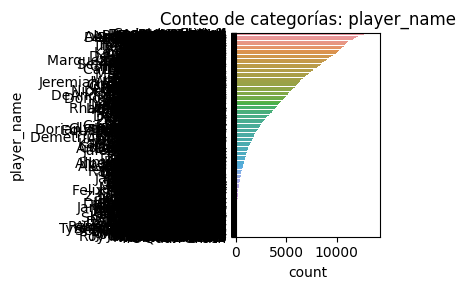

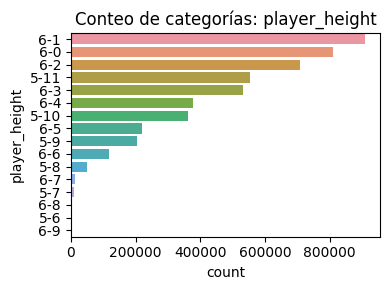

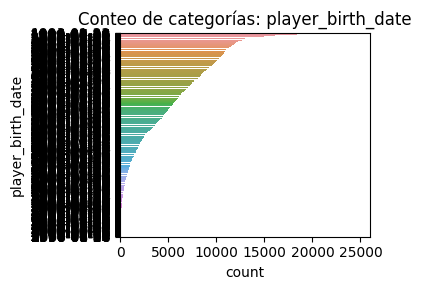

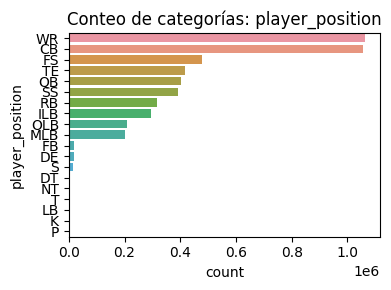

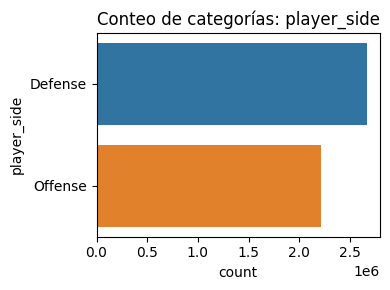

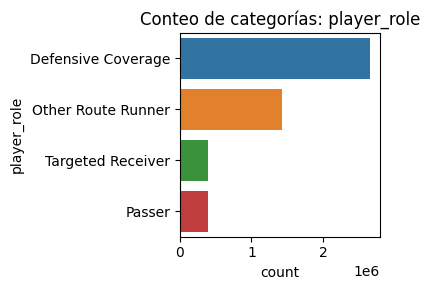

In [11]:
cat_cols = train_df.select_dtypes(include=['object','category']).columns
for col in cat_cols:
    plt.figure(figsize=(4,3))
    sns.countplot(y=col, data=train_df, order=train_df[col].value_counts().index)
    plt.title(f"Conteo de categorías: {col}")
    plt.tight_layout()
    plt.show()


**Análisis**

Se observa el dataset está construido de manera que se estudian jugadas en ambos sentidos de juego a lo largo del campo, sin embargo, existe un desfase entre la cantidades de jugadores y posiciones de tipo defensivo frente al tipo ofensivo a favor del primero, esto es un indicador de que las jugadas están caracterizadas por un lanzador, un pequeño grupo de corredores que buscan interceptar el pase lanzado y un grupo mayor de jugadores defensivos que buscan prevenir que se concrete la jugada.

Adicionalmente, existen jugadores cuyo nombre aparece con mayor frecuencia, esto contribuye a la hipótesis de que estos jugadores son protagonistas en el juego con un alta participación e influencia en el mismo.

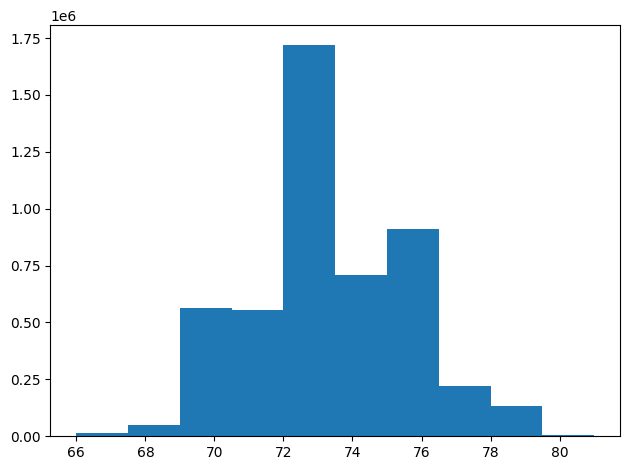

In [6]:
train_df['player_height'] = train_df['player_height'].apply(parse_height)
train_df['player_height'] = train_df['player_height'].fillna(train_df['player_height'].median())
    
plt.hist(train_df['player_height'])
plt.tight_layout()
plt.show()

**Análisis**

A pesar que la altura es una variable en principio, no numérica, transformarla hacia una variable numérica nos provee de mayor información respecto a las misma. Así, podemos observar esta posee una distribución aproximadamente normal, con media aproximada de 73 pulgadas ó 1,85 metros.

## **Visualización de Matriz de Correlación**

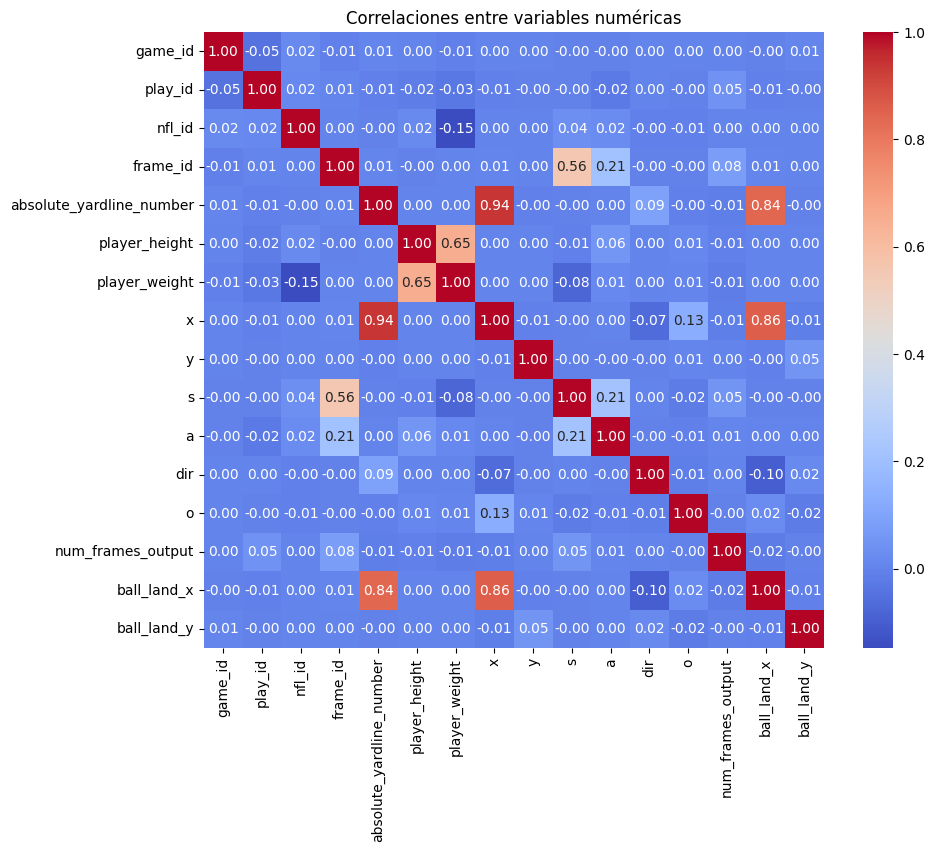

In [7]:
num_cols = train_df.select_dtypes(include='number').columns
corr = train_df[num_cols].corr().to_numpy()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", xticklabels=num_cols, yticklabels=num_cols)
plt.title("Correlaciones entre variables numéricas")
plt.show()

**Análisis**

De acuerdo a la matriz de correlaciones, existe una relación de proporcionalidad positiva entre `ball_land_x` y `absolute_yard_line` con `x` y entre ellas mismas. Así mismo, existe una relación de proporcionalidad positiva entre la velocidad y la aceleración con el paso del tiempo transcurrido a lo largo de la jugada (`s` y `a` con `frame_id`). De igual manera, sucede lo mismo con resultados esperados (Estatura y Peso, Aceleración y Velocidad)

## **ScatterPlots de Variables Numéricas frente a Variables Objetivo (Relaciones Lineales)**

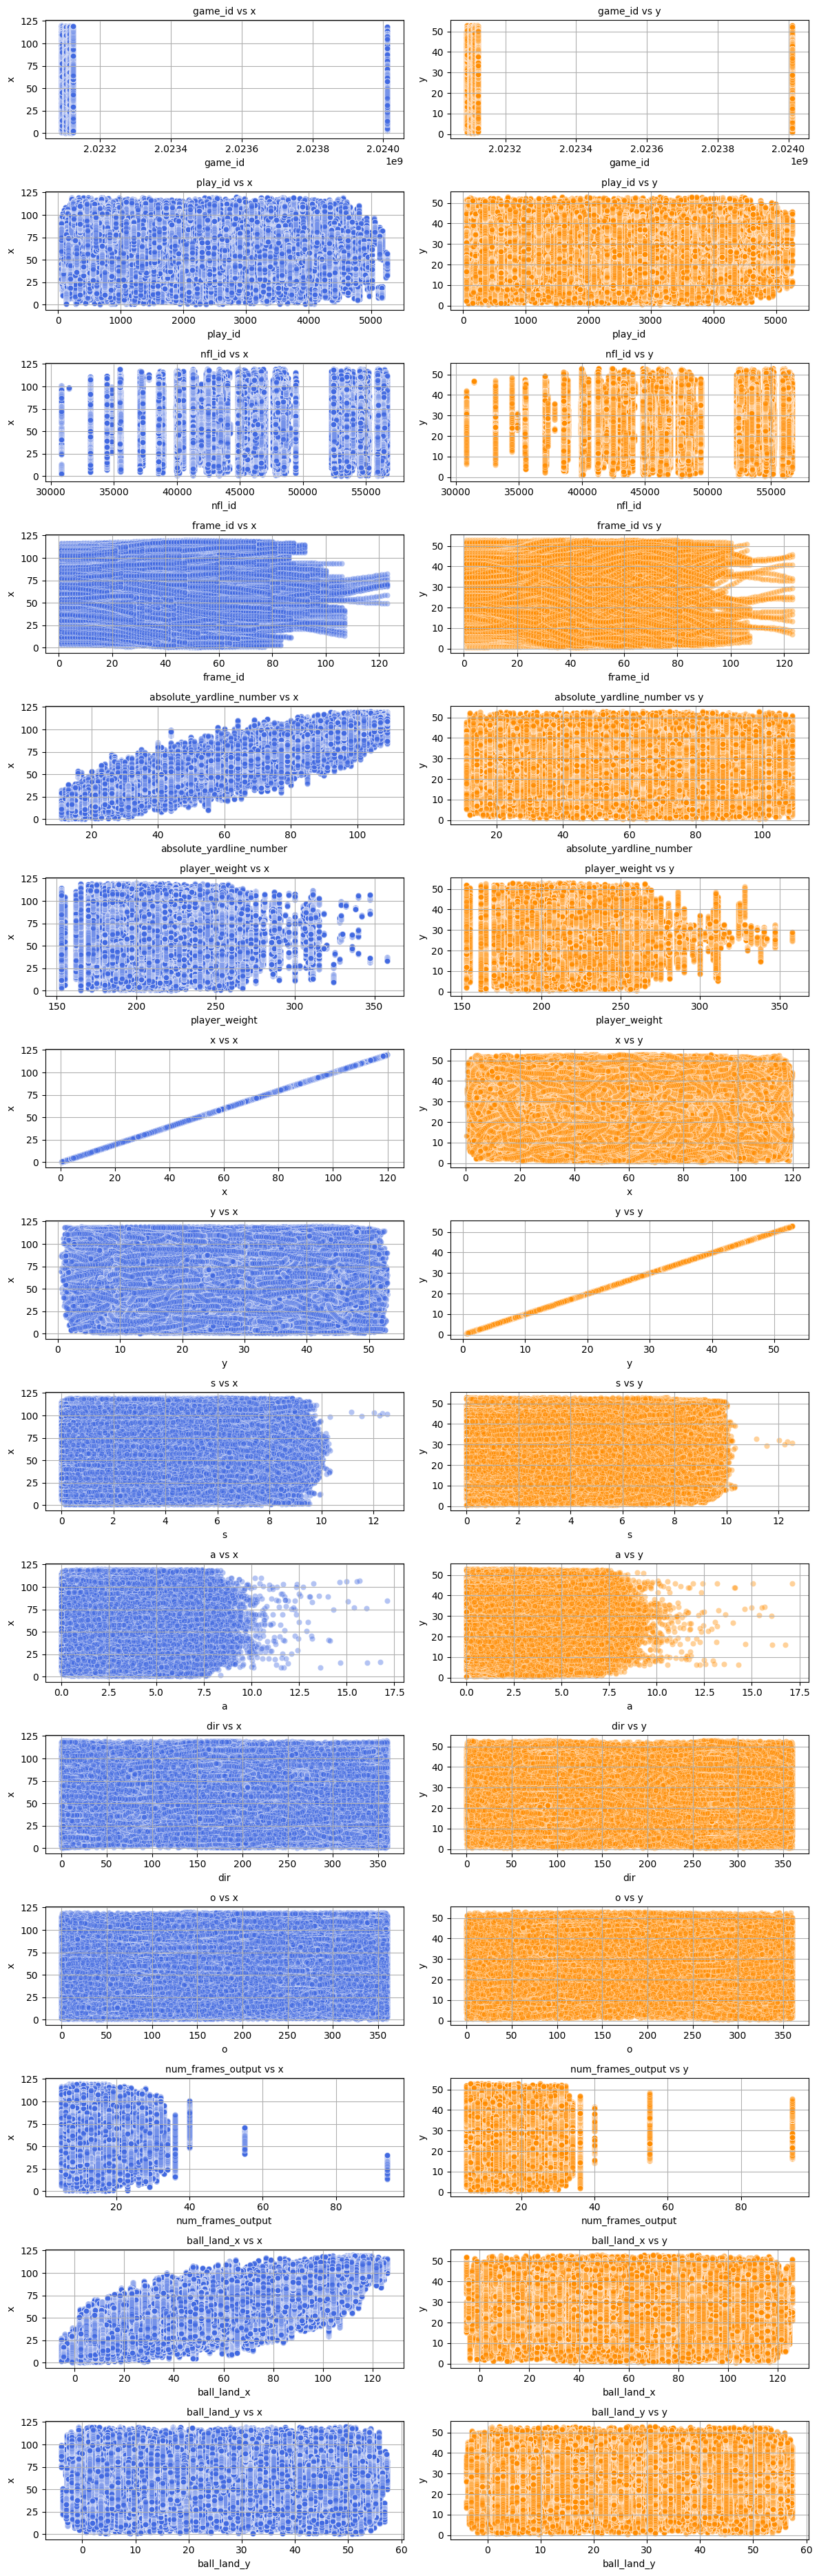

In [14]:
import math

# Variables Objetivo
target1 = "x"
target2 = "y"

# Definición de Malla de Gráficas (Izquierda: X, Derecha: Y)
n_rows = len(num_cols)
fig, axes = plt.subplots(n_rows, 2, figsize=(12, n_rows * 2.5), sharey=False)

# Plot each feature vs both targets
for i, col in enumerate(num_cols):
    # Izquierda: Arbitrario vs X
    sns.scatterplot(
        x=train_df[col],
        y=train_df[target1],
        alpha=0.4,
        color='royalblue',
        ax=axes[i, 0]
    )
    axes[i, 0].set_title(f"{col} vs {target1}", fontsize=10)
    axes[i, 0].set_xlabel(col)
    axes[i, 0].set_ylabel(target1)
    axes[i, 0].grid(True)

    # Derecha: Arbitrario vs Y
    sns.scatterplot(
        x=train_df[col],
        y=train_df[target2],
        alpha=0.4,
        color='darkorange',
        ax=axes[i, 1]
    )
    axes[i, 1].set_title(f"{col} vs {target2}", fontsize=10)
    axes[i, 1].set_xlabel(col)
    axes[i, 1].set_ylabel(target2)
    axes[i, 1].grid(True)

plt.tight_layout()
plt.show()


**Análisis**

De acuerdo a estas gráficas, no hay relación lineal aparente entre `x` y `y` con ninguna otra variable numérica, a excepción de las relaciones `ball_land_x` y `absolute_yard_line` con `x`.

# **Análisis de Datos Condensado - Variables Físicas**

          NFL BIG DATA BOWL 2026 - ANÁLISIS CONDENSADO DE DATOS FÍSICOS

#1 CARGA DE DATOS
Cargando datos de entrenamiento...


Input files:   0%|          | 0/18 [00:00<?, ?it/s]

Output files:   0%|          | 0/18 [00:00<?, ?it/s]

Cargando datos de prueba...

 Tamaño de los Datos:
  • Entradas de Entrenamiento: (4880579, 23)
  • Salidas de Entrenamiento: (562936, 6)
  • Entradas de Prueba: (49753, 23)
  • Salidas de Prueba: (5837, 4)

#2: ANÁLISIS BÁSICO

 Revisión:
--------------------------------------------------
• Registros Totales de Entrenamiento: 4,880,579
• Partidos Únicos: 272
• Jugadas Únicas: 14108
• Jugadores Únicos: 1384
• Fotogramas Promedio por Jugada: 11.4

 Estadísticas por Rol de Jugador:
                    nfl_id     s                  a             
                   nunique  mean   std median  mean   std median
player_role                                                     
Defensive Coverage     797  2.54  1.85   2.32  1.80  1.27   1.60
Other Route Runner     509  3.99  2.51   4.19  2.60  1.50   2.54
Passer                  79  1.80  1.50   1.54  1.93  1.27   1.82
Targeted Receiver      464  3.99  2.47   4.19  2.69  1.52   2.65

 DASHBOARD DE VISUALIZACIÓN...


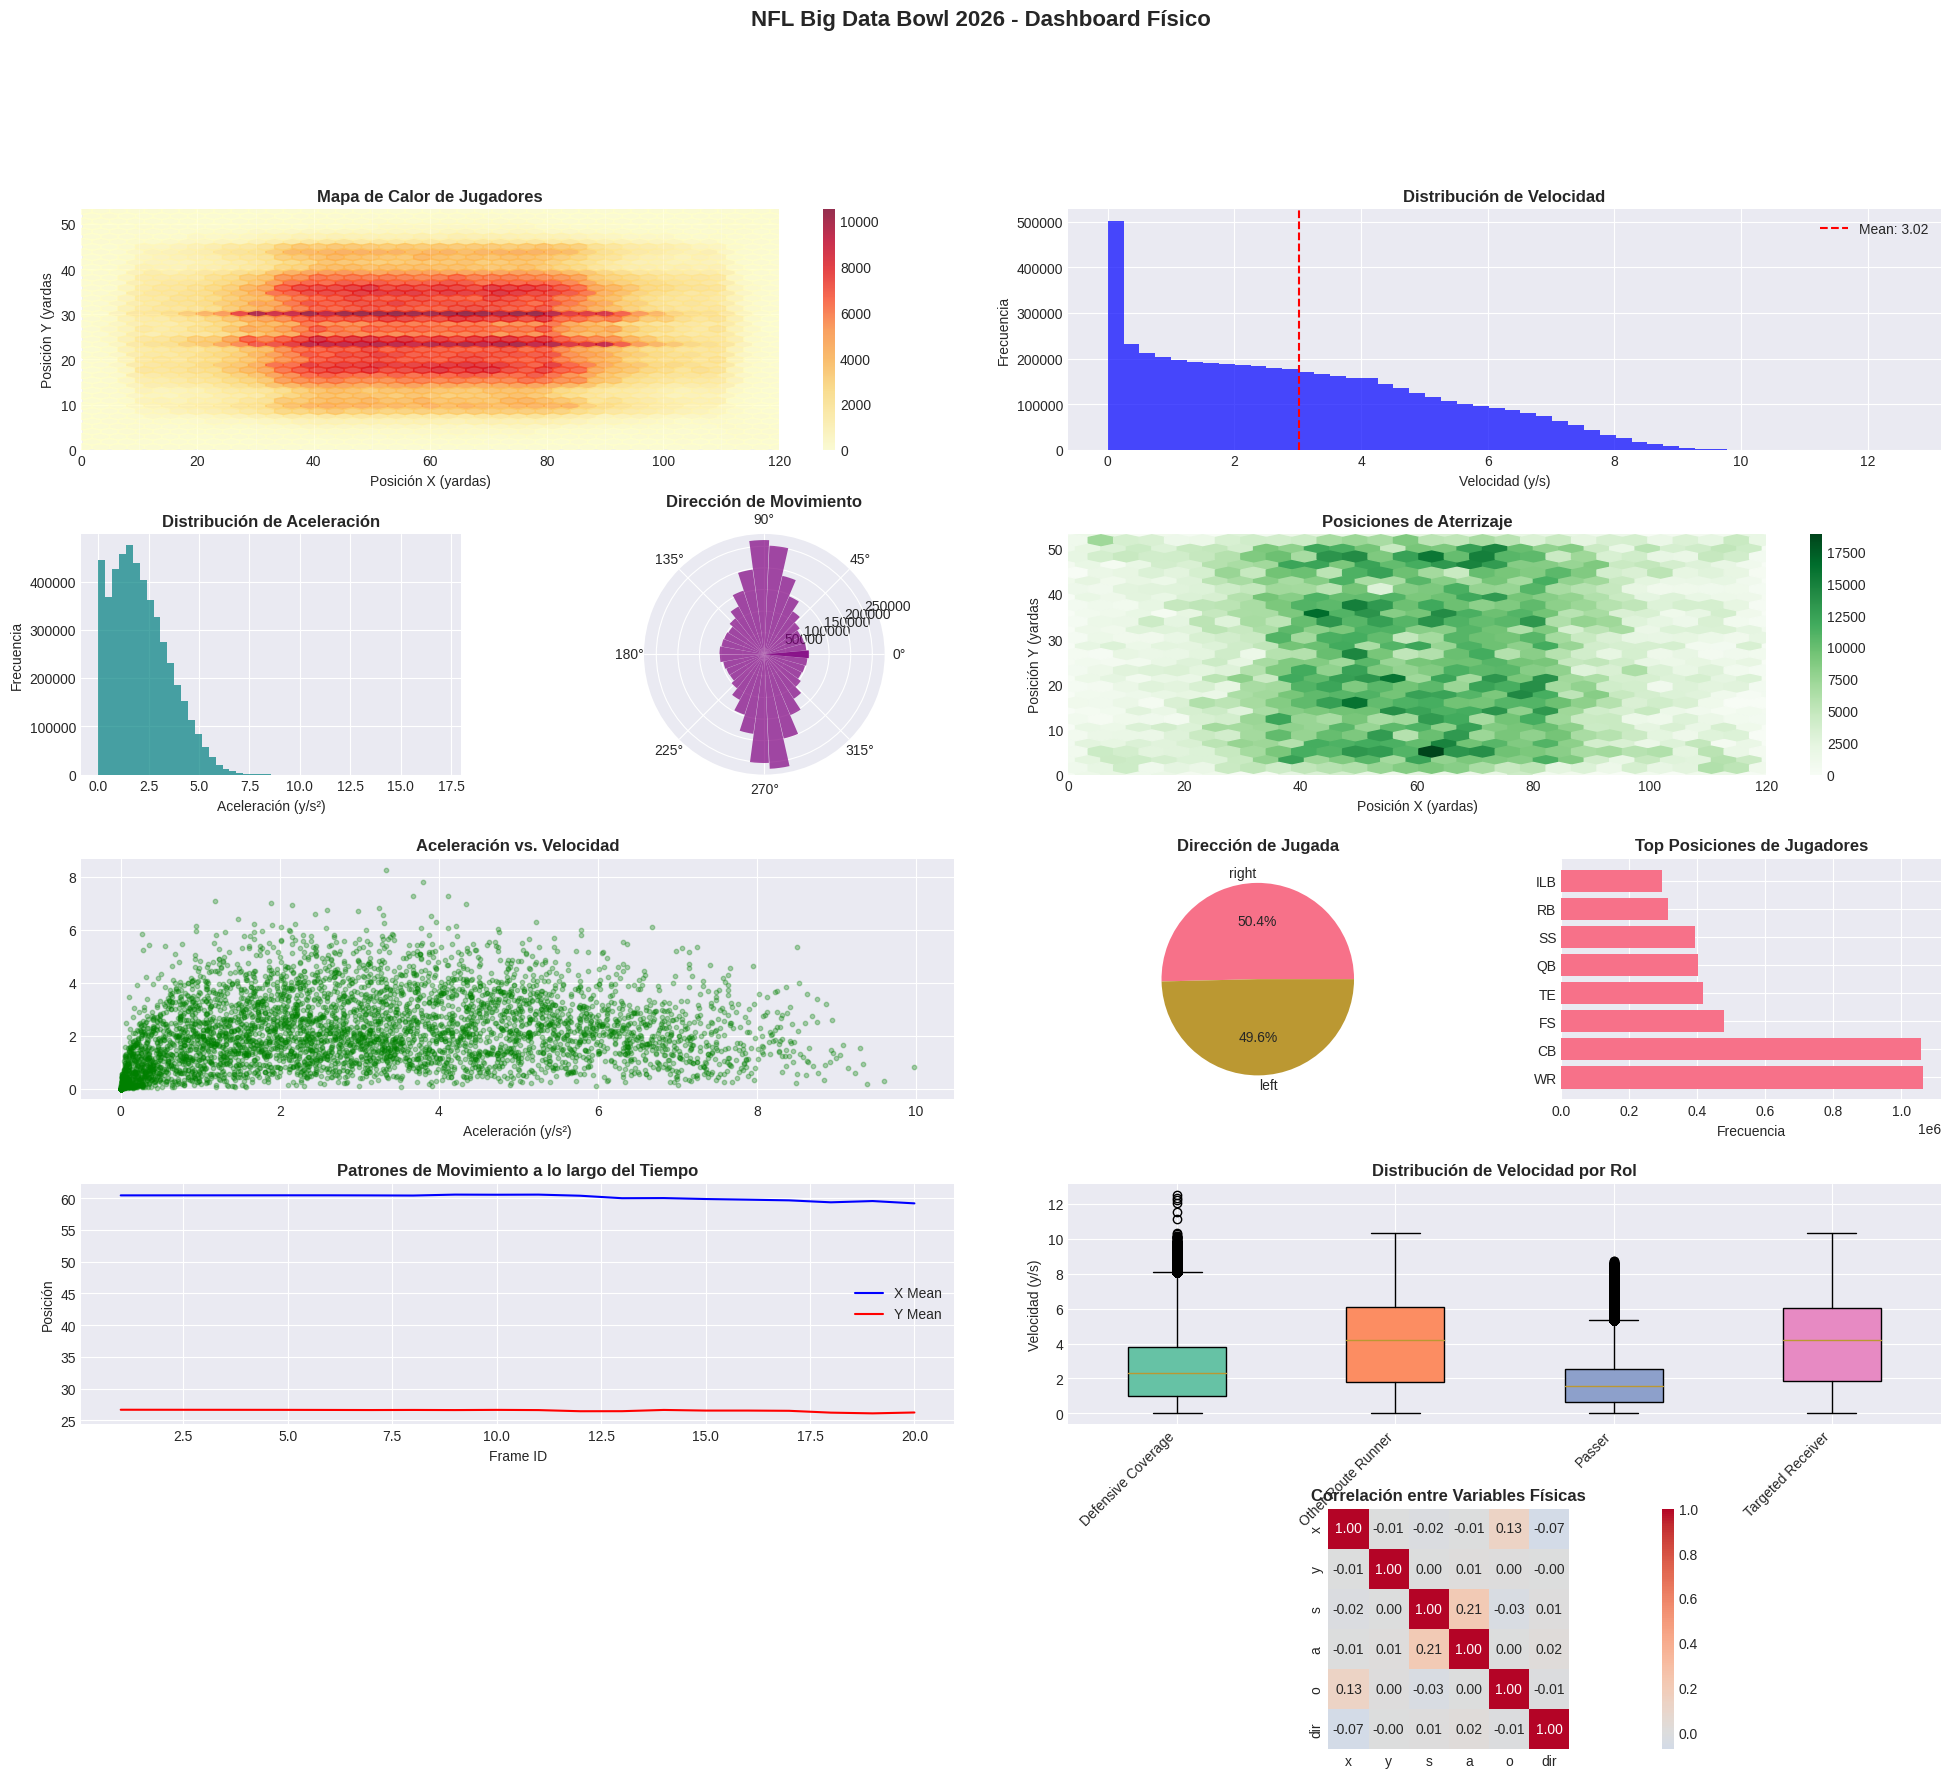

In [8]:
# Importe de Librerías
import os
import glob
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from tqdm.auto import tqdm

# Ajustes de Graficado
import matplotlib.gridspec as gridspec
from matplotlib.patches import Rectangle

warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.dpi'] = 100

print("="*90)
print(" "*10 + "NFL BIG DATA BOWL 2026 - ANÁLISIS CONDENSADO DE DATOS FÍSICOS")
print("="*90)

# ================================================================================
# PARTE 1: CARGA DE DATOS
# ================================================================================

# Precarga de Datos
print("="*90)
print("\n#1 CARGA DE DATOS")
print("="*90)

DATA_DIR = "/kaggle/input/nfl-big-data-bowl-2026-prediction/"

# Carga de Datos de Entrenamiento
print("Cargando datos de entrenamiento...")
input_files = sorted(glob.glob(os.path.join(DATA_DIR, "train/input_2023_w*.csv")))
output_files = sorted(glob.glob(os.path.join(DATA_DIR, "train/output_2023_w*.csv")))

df_in = pd.concat((pd.read_csv(p) for p in tqdm(input_files, desc="Input files")), ignore_index=True) # Variables de Entrada
df_out = pd.concat((pd.read_csv(p) for p in tqdm(output_files, desc="Output files")), ignore_index=True) # Variables de Salida

# Carga de Datos de Prueba
print("Cargando datos de prueba...")
test_in = pd.read_csv(os.path.join(DATA_DIR, "test_input.csv"))
test_out = pd.read_csv(os.path.join(DATA_DIR, "test.csv"))

print(f"\n Tamaño de los Datos:")
print(f"  • Entradas de Entrenamiento: {df_in.shape}")
print(f"  • Salidas de Entrenamiento: {df_out.shape}")
print(f"  • Entradas de Prueba: {test_in.shape}")
print(f"  • Salidas de Prueba: {test_out.shape}")

# ================================================================================
# PARTE 2: ANÁLISIS BÁSICO
# ================================================================================}
print("="*90)
print("\n#2: ANÁLISIS BÁSICO")
print("="*90)

# Estadística Básica
print("\n Revisión:")
print("-"*50)
print(f"• Registros Totales de Entrenamiento: {len(df_in):,}")
print(f"• Partidos Únicos: {df_in['game_id'].nunique()}")
print(f"• Jugadas Únicas: {df_in.groupby('game_id')['play_id'].nunique().sum()}")
print(f"• Jugadores Únicos: {df_in['nfl_id'].nunique()}")
print(f"• Fotogramas Promedio por Jugada: {df_out.groupby(['game_id', 'play_id'])['frame_id'].nunique().mean():.1f}")

# Estadísticas por Rol de Jugador
print("\n Estadísticas por Rol de Jugador:")
try:
    role_stats = df_in.groupby('player_role').agg({
        'nfl_id': 'nunique',
        's': ['mean', 'std', 'median'],
        'a': ['mean', 'std', 'median']
    }).round(2)
    print(role_stats)
except:
    print("No se pudieron calcular las estadísticas por rol")

# ================================================================================
# PARTE 3: DASHBOARD DE VISUALIZACIÓN
# ================================================================================
print("\n DASHBOARD DE VISUALIZACIÓN...")

try:
    fig = plt.figure(figsize=(24, 20))
    gs = gridspec.GridSpec(5, 4, figure=fig, hspace=0.35, wspace=0.3)

    # 1. Mapa de Calor de Jugadores - Posición (x,y)
    ax1 = fig.add_subplot(gs[0, :2])
    hexbin = ax1.hexbin(df_in['x'], df_in['y'], gridsize=40, cmap='YlOrRd', alpha=0.8)
    ax1.set_xlim(0, 120)
    ax1.set_ylim(0, 53.3)
    for yard in range(0, 121, 10):
        ax1.axvline(x=yard, color='white', linewidth=0.5, alpha=0.3)
    ax1.set_xlabel('Posición X (yardas)')
    ax1.set_ylabel('Posición Y (yardas')
    ax1.set_title('Mapa de Calor de Jugadores', fontweight='bold')
    plt.colorbar(hexbin, ax=ax1)

    # 2. Distribución de Velocidad
    ax2 = fig.add_subplot(gs[0, 2:])
    ax2.hist(df_in['s'].dropna(), bins=50, color='blue', alpha=0.7)
    ax2.axvline(df_in['s'].mean(), color='red', linestyle='--', label=f'Mean: {df_in["s"].mean():.2f}')
    ax2.set_xlabel('Velocidad (y/s)')
    ax2.set_ylabel('Frecuencia')
    ax2.set_title('Distribución de Velocidad', fontweight='bold')
    ax2.legend()

    # 3. Distribución de Aceleración
    ax3 = fig.add_subplot(gs[1, 0])
    ax3.hist(df_in['a'].dropna(), bins=50, color='teal', alpha=0.7)
    ax3.set_xlabel('Aceleración (y/s²)')
    ax3.set_ylabel('Frecuencia')
    ax3.set_title('Distribución de Aceleración', fontweight='bold')

    # 4. Distribución de Dirección de Movimiento
    ax4 = fig.add_subplot(gs[1, 1], projection='polar')
    directions = df_in['dir'].dropna() * np.pi / 180
    counts, bins = np.histogram(directions, bins=36)
    theta = np.linspace(0, 2*np.pi, 36)
    ax4.bar(theta, counts, width=2*np.pi/36, alpha=0.7, color='purple')
    ax4.set_title('Dirección de Movimiento', fontweight='bold', pad=20)

    # 5. Posiciones de Aterrizaje de la Pelota
    ax5 = fig.add_subplot(gs[1, 2:])
    hexbin2 = ax5.hexbin(df_in['ball_land_x'], df_in['ball_land_y'], gridsize=30, cmap='Greens')
    ax5.set_xlim(0, 120)
    ax5.set_ylim(0, 53.3)
    ax5.set_xlabel('Posición X (yardas)')
    ax5.set_ylabel('Posición Y (yardas')
    ax5.set_title('Posiciones de Aterrizaje', fontweight='bold')
    plt.colorbar(hexbin2, ax=ax5)

    # 6. Diagrama de Fase - Aceleración vs. Velocidad
    ax6 = fig.add_subplot(gs[2, :2])
    sample = df_in.sample(min(5000, len(df_in)))
    ax6.scatter(sample['s'], sample['a'], alpha=0.3, s=10, c='green')
    ax6.set_xlabel('Velocidad (y/s)')
    ax6.set_xlabel('Aceleración (y/s²)')
    ax6.set_title('Aceleración vs. Velocidad', fontweight='bold')

    # 7. Dirección de Jugada
    ax7 = fig.add_subplot(gs[2, 2])
    play_dir = df_in['play_direction'].value_counts()
    ax7.pie(play_dir.values, labels=play_dir.index, autopct='%1.1f%%')
    ax7.set_title('Dirección de Jugada', fontweight='bold')

    # 8. Posiciones de Jugadores
    ax8 = fig.add_subplot(gs[2, 3])
    pos_counts = df_in['player_position'].value_counts().head(8)
    ax8.barh(range(len(pos_counts)), pos_counts.values)
    ax8.set_yticks(range(len(pos_counts)))
    ax8.set_yticklabels(pos_counts.index)
    ax8.set_xlabel('Frecuencia')
    ax8.set_title('Top Posiciones de Jugadores', fontweight='bold')

    # 9. Patrón de Series de Tiempo - Posición (x, y)
    ax9 = fig.add_subplot(gs[3, :2])
    frame_stats = df_out.groupby('frame_id').agg({'x': 'mean', 'y': 'mean'}).reset_index() # Calculamos Media de la Posición
    frame_stats = frame_stats[frame_stats['frame_id'] <= 20]
    ax9.plot(frame_stats['frame_id'], frame_stats['x'], 'b-', label='X Mean')
    ax9.plot(frame_stats['frame_id'], frame_stats['y'], 'r-', label='Y Mean')
    ax9.set_xlabel('Frame ID')
    ax9.set_ylabel('Posición')
    ax9.set_title('Patrones de Movimiento a lo largo del Tiempo', fontweight='bold')
    ax9.legend()

    # 10. Distribución de Velocidad por Rol - Boxplots
    ax10 = fig.add_subplot(gs[3, 2:])
    roles = df_in['player_role'].unique()   # Depuración de Roles Únicos
    role_speeds = []
    role_labels = []
    for role in roles:
        role_data = df_in[df_in['player_role']==role]['s'].dropna()     # Tabla de Velocidades por Rol
        if len(role_data) > 0:
            role_speeds.append(role_data)
            role_labels.append(role)
    if role_speeds:
        bp = ax10.boxplot(role_speeds, labels=role_labels, patch_artist=True)   # Boxplot de Velocidades por Rol
        for patch, color in zip(bp['boxes'], plt.cm.Set2(range(len(bp['boxes'])))):
            patch.set_facecolor(color)
    ax10.set_xlabel('Rol de Jugador')
    ax10.set_ylabel('Velocidad (y/s)')
    ax10.set_title('Distribución de Velocidad por Rol', fontweight='bold')
    plt.setp(ax10.xaxis.get_majorticklabels(), rotation=45, ha='right')

    # 11. Matriz de Correlación de Variables Físicas
    ax11 = fig.add_subplot(gs[4, :])
    phys_cols = ['x', 'y', 's', 'a', 'o', 'dir']
    corr_data = df_in[phys_cols].dropna().sample(min(10000, len(df_in)))
    corr_matrix = corr_data.corr().to_numpy()
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, ax=ax11, square=True, xticklabels=phys_cols, yticklabels=phys_cols)
    ax11.set_title('Correlación entre Variables Físicas', fontweight='bold')

    plt.suptitle('NFL Big Data Bowl 2026 - Dashboard Físico', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.savefig('physics_eda.png', dpi=100, bbox_inches='tight')
    plt.show()
except Exception as e:
    print(f"No se pudieron crear todas las gráficas: {e}")

**Discusión y Pruebas de Hipótesis**

- El mapa de calor de posiciones de jugadores muestra que si existen canales de tránsito a lo largo del Eje X a diferentes alturas del Eje Y en posiciones espejo para este. Así mismo, acompañándonos del mapa de aterrizaje de la pelota, vemos que las jugadas se concentran en el centro del campo, se podría concluir que pocas jugadas terminan en Touchdown (Intercepción del Pase ó Pases Múltiples antes del Touchdown).
- Los roles ofensivos están caracterizados por jugadores mucho veloces; así mismo, los roles defensivos están caracterizados por jugadores más lentos o bien, estos roles son mucho más posicionales, por tanto no implica un recorrido tan extenso como el de los primeros.
- Las mayorías de las jugadas se concentran a lo largo del eje X, esto podría implicar que el eje Y es un eje de rutas modificadas, de correcciones de rumbo para prevenir pérdidas de la pelota y asegurarla por parte de los corredores o el receptor en específico.

# **Planteamiento de Modelos y Entrenamiento**

**Modelos**

Tal como se comentó previamente, la naturaleza de las implementaciones de KernelRidge y GaussianProcessRegressor desde las librerías scikit-learn e inclusive, cuML; hacen imposible la incorporación de estos modelos a este dataset sin considerar una fuga de datos masivo por una reducción extrema del tamaño de muestra. Así mismo, se podría considerar manipular levemente el tamaño de muestra de SVR y RandomForestRegressor para optimización de tiempo de entrenamiento y recursos computacionales.

Los modelos a implementar serán:
- LinearRegressor
- Lasso
- ElasticNet
- SGD
- BayesianRidge
- SVR
- RandomForestRegressor
- XGBRegressor

Siempre que sea posible, se usará la implementación propuesta en cuML de cada algoritmo, en caso contrario, se recurrirá a la implementación nativa.


**Métricas**

Las métricas de evaluación serán las siguientes:
- **MSE:** Cuanto menor sea el MSE, mejor se ajusta el modelo. Es útil cuando los errores grandes son costosos, por ejemplo, predecir una distancia o trayectoria en yardas con un error grande implica una mala estimación de la jugada. Sin embargo, es sensible a valores atípicos (jugadas excepcionales o outliers de velocidad/posición).
- **MAE:** Más robusto a valores atípicos que el MSE. Indica el error promedio real en las mismas unidades de la variable objetivo (por ejemplo, yardas). En el contexto de NFL Big Data Bowl, si se predice un MAE = 0.8 significa que, en promedio, la predicción está errada por menos de una yarda, lo cual es muy interpretable.
- **MAPE:** Expresa qué porcentaje del valor real es el error promedio. Es útil para comparar modelos o variables con diferentes escalas entre datos. Se ve limitado cuando el dato real es cercano a cero, ya que el error relativo se dispara. En datos del NFL Big Data, esto puede pasar con velocidades o aceleraciones cercanas a 0.
- **R2:** El coeficiente de correlación cuadrado mide qué proporción de la variabilidad total de los datos es explicada por el modelo. Es una métrica de bondad de ajuste. En NFL Big Data Bowl, un valor alto (cercano a 1) indica que el modelo logra capturar buena parte de la variabilidad en las trayectorias o distancias predichas. Ideal para evaluar la capacidad predictiva global del modelo.


**Normalización de Datos**

Teniendo en cuenta que existen relaciones no lineales, pero al mismo tiempo, distribuciones altamente sesgadas y con colas muy pesadas en nuestros datos, debemos corregir en la medida de lo posible el peso de los valores atípicos en el modelo sin afectar las relaciones no lineales implícitas de los datos, para ello, se utilizará `RobustScaler()`


**Selección de Rangos de Hiperparámetros**

La optimización bayesiana de hiperparámetros se llevará a cabo con `Optuna`. Para dicha optimización, se seleccionaron rangos adecuados para parámetros de aprendizaje y regularización según sea el modelo, lo suficientemente amplios para que por medio de distribuciones `log-uniform`, el paquete de optimización tenga la capacidad de probar un espacio de parámetros tales que prevengan el sobreajuste y al mismo tiempo, que controle la regularización usada de manera que no se pierda información sobre el patrón de datos de forma innecesaria. Más adelante veremos como `LinearRegressor` funciona como un estándar básico para comprobar la elección adecuada de hiperparámetros de los otros modelos, puesto que al ser el caso base de regresión

In [6]:
# Importe de Librerías
import os
import glob
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from tqdm.auto import tqdm
import cudf, cupy, cuml
import time
import optuna # Optimización Bayesiana de Hiperparámetros 
from cuml.model_selection import train_test_split # Particionamiento
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score # Métricas
from cuml.preprocessing import RobustScaler  # Normalización y Escalamiento
from cuml.preprocessing import LabelEncoder  # Codificación Categórica

# Regresores
from cuml.linear_model import LinearRegression, Lasso, ElasticNet
from cuml.solvers import SGD
from cuml.svm import SVR
from cuml.ensemble import RandomForestRegressor
from sklearn.linear_model import BayesianRidge
from xgboost import XGBRegressor


# =====================================================
# Función de evaluación
# =====================================================
def to_cpu(arr):
    import cupy as cp
    return cp.asnumpy(arr)

def evaluate(y_true, y_pred):
    """Cómputo de Métricas de Regresión"""
    mae = mean_absolute_error(to_cpu(y_true), to_cpu(y_pred))
    mse = mean_squared_error(to_cpu(y_true), to_cpu(y_pred))
    mape = mean_absolute_percentage_error(to_cpu(y_true), to_cpu(y_pred))
    r2 = r2_score(to_cpu(y_true), to_cpu(y_pred))
    
    return {"mae": mae, "mse": mse, "mape": mape, "r2": r2}

# =====================================================
# Función de impresión
# =====================================================
def print_metrics(model_name, val_metrics, test_metrics, best_params, search_time):
    print(f"\n=== {model_name} RESULTS ===")
    print(f"Search completed in {search_time:.1f}s")
    print(f"Best params: {best_params}")
    print("Validation metrics:", val_metrics)
    print("Test metrics:", test_metrics)


# =====================================================
# Importe de Datos
# =====================================================

# Precarga de Datos
print("="*90)
print("\n#1 CARGA DE DATOS")
print("="*90)

DATA_DIR = "/kaggle/input/nfl-big-data-bowl-2026-prediction/"

# Carga de Datos de Entrenamiento
print("Cargando datos de entrenamiento...")
input_files = sorted(glob.glob(os.path.join(DATA_DIR, "train/input_2023_w*.csv")))
output_files = sorted(glob.glob(os.path.join(DATA_DIR, "train/output_2023_w*.csv")))

df_in = pd.concat((pd.read_csv(p) for p in tqdm(input_files, desc="Input files")), ignore_index=True) # Variables de Entrada
df_out = pd.concat((pd.read_csv(p) for p in tqdm(output_files, desc="Output files")), ignore_index=True) # Variables de Salida

# Carga de Datos de Prueba
print("Cargando datos de prueba...")
test_in = pd.read_csv(os.path.join(DATA_DIR, "test_input.csv"))
test_out = pd.read_csv(os.path.join(DATA_DIR, "test.csv"))

print(f"\n Tamaño de los Datos:")
print(f"  • Entradas de Entrenamiento: {df_in.shape}")
print(f"  • Salidas de Entrenamiento: {df_out.shape}")
print(f"  • Entradas de Prueba: {test_in.shape}")
print(f"  • Salidas de Prueba: {test_out.shape}")
print(f"Environment: use_cudf=True, use_cuml=True, use_cupy=True")

# =====================================================
# Preparación Robusta de Datos
# =====================================================
def prepare_data_robust(df_in, df_out, test_in=None, test_out=None, is_train=True):
    """Preparation robusta de datos que incluye
    ingeniería de características,
    codificación de variables categóricas,
    normalización de variables numéricas
    y particionamiento de datos en el esquema hold-out
    de validación (60-20-20)
    """
    
    # =============================
    # PASO 1: Preparar Datos
    # =============================
    df = df_in.copy() if is_train else test_in.copy()
    
    # --- Última observación de cada jugador ---
    last_obs = (
        df.sort_values(['game_id', 'play_id', 'nfl_id', 'frame_id'])
        .groupby(['game_id', 'play_id', 'nfl_id'], as_index=False)
        .last()
    )
    last_obs = last_obs.rename(columns={'x': 'x_last', 'y': 'y_last'})

    # --- Identificar Jugador Receptor ---
    targets = last_obs[last_obs['player_role'] == "Targeted Receiver"][
        ['game_id', 'play_id', 'nfl_id', 'x_last', 'y_last']
    ].copy()

    if len(targets) > 0:
        targets = targets.rename(columns={
            'nfl_id': 'target_nfl_id',
            'x_last': 'target_x',
            'y_last': 'target_y'
        })
        last_obs = last_obs.merge(
            targets[['game_id', 'play_id', 'target_x', 'target_y', 'target_nfl_id']],
            on=['game_id', 'play_id'],
            how='left'
        )

    # =====================================================
    # Ingeniería de Características
    # =====================================================
    print("\n 1. Normalizando dirección de jugada...")
    df_in = normalize_play_direction(df_in)
    test_in = normalize_play_direction(test_in)
    
    print("\n 2. Calculando componentes de la velocidad (vx, vy)")
    last_obs['vx'] = last_obs['s'] * np.cos(np.radians(last_obs['dir']))
    last_obs['vy'] = last_obs['s'] * np.sin(np.radians(last_obs['dir']))

    keep_cols = [
        'game_id','play_id','nfl_id','x_last','y_last','s','a','o','dir',
        'vx','vy','player_role','player_side','player_position',
        'ball_land_x','ball_land_y','absolute_yardline_number',
        'player_weight'
    ]
    if 'target_x' in last_obs.columns:
        keep_cols += ['target_x', 'target_y', 'target_nfl_id']

    keep_cols = [c for c in keep_cols if c in last_obs.columns]
    result = (
        df_out.merge(last_obs[keep_cols], on=['game_id', 'play_id', 'nfl_id'], how='left')
        if is_train
        else test_template.merge(last_obs[keep_cols], on=['game_id', 'play_id', 'nfl_id'], how='left')
    )

    # Características Adicionales
    print("\n 3. Calculando distancia a la pelota")
    result['dist_to_ball'] = np.sqrt((result['ball_land_x'] - result['x_last'])**2 +
                                     (result['ball_land_y'] - result['y_last'])**2)

    print("\n 4. Calculando ángulo a la pelota")
    result['angle_to_ball'] = np.arctan2(result['ball_land_y'] - result['y_last'],
                                         result['ball_land_x'] - result['x_last'])

    print("\n 5. Calculando distancia al objetivo")
    if 'target_x' in result.columns:
        result['dist_to_target'] = np.sqrt((result['target_x'] - result['x_last'])**2 +
                                           (result['target_y'] - result['y_last'])**2)
        result['is_target'] = (result['nfl_id'] == result['target_nfl_id']).astype(int)

    print("\n 6. Calculando distancia a límites de campo")
    result['dist_to_sideline'] = np.minimum(result['y_last'], 53.3 - result['y_last'])
    result['dist_to_endzone'] = np.minimum(result['x_last'], 120 - result['x_last'])

    # Variables Objetivo
    if is_train:
        result['dx'] = result['x'] - result['x_last']
        result['dy'] = result['y'] - result['y_last']

    num_features = [
        'x_last','y_last','s','a','o','dir','vx','vy','dist_to_ball','angle_to_ball',
        'dist_to_target','dist_to_sideline','dist_to_endzone','absolute_yardline_number','player_weight',
        'ball_land_x','ball_land_y'
    ]
    num_features = [f for f in num_features if f in result.columns] # Variables Numéricas

    cat_features = ['player_role','player_side','player_position'] # Variables Categóricas
    cat_features = [f for f in cat_features if f in result.columns]

    # =====================================================
    # Codificación de Variables Categóricas
    # =====================================================
    print("\n 7. Codificando Variables Categóricas")
    encoders = {}
    for col in cat_features:
        result[col] = result[col].fillna("missing").astype(str)
        le = LabelEncoder()
        result[col] = le.fit_transform(result[col])
        encoders[col] = le

    # =====================================================
    # Reescalamiento y Normalización de Datos
    # =====================================================
    print("\n 8. Reescalando Variables Numéricas")
    scaler = RobustScaler()
    num_features_arr = result[num_features].copy().values
    num_results_arr = scaler.fit_transform(num_features_arr)
    
    # Retorna a cuDF
    result[num_features] = cudf.DataFrame(num_results_arr, columns=num_features)

    # =====================================================
    # Particionamiento de Datos
    # =====================================================
    print("\n 9. Particionando Datos")
    X = result[num_features + cat_features].copy()
    y_dx = result['dx'] if 'dx' in result.columns else None
    y_dy = result['dy'] if 'dy' in result.columns else None


    X_train_full, X_temp, y_dx_full, y_dx_temp = train_test_split(X, y_dx, test_size=0.4, random_state=42)
    _, _, y_dy_full, y_dy_temp = train_test_split(X, y_dy, test_size=0.4, random_state=42)

    X_val, X_test, y_dx_val, y_dx_test = train_test_split(X_temp, y_dx_temp, test_size=0.5, random_state=42)
    _, _, y_dy_val, y_dy_test = train_test_split(X_temp, y_dy_temp, test_size=0.5, random_state=42)

    print(f"Tamaños: Entrenamiento={len(X_train_full)}, Validación={len(X_val)}, Prueba={len(X_test)}")

    # Export for external models
    return (X_train_full, X_val, X_test,
            y_dx_full, y_dx_val, y_dx_test,
            y_dy_full, y_dy_val, y_dy_test)


# =====================================================
# Optimización Bayesiana de Hiperparámetros
# =====================================================
def objective(trial, model_name, X_train, y_train, X_val, y_val):
    if model_name == "LinearRegression":
        model = LinearRegression()
    elif model_name == "Lasso":
        alpha = trial.suggest_float("alpha", 1e-3, 1.0, log=True)
        model = Lasso(alpha=alpha)
    elif model_name == "ElasticNet":
        alpha = trial.suggest_float("alpha", 1e-3, 1.0, log=True)
        l1_ratio = trial.suggest_float("l1_ratio", 0.1, 0.9)
        model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
    elif model_name == "SGD":
        alpha = trial.suggest_float("alpha", 1e-3, 1.0, log=True)
        eta0 = trial.suggest_float("eta0", 1e-3, 0.1, log=True)
        epochs = trial.suggest_int("epochs", 100, 3000)
        model = SGD(penalty='elasticnet', batch_size=16384, alpha=alpha, eta0=eta0, epochs=epochs)
    elif model_name == "BayesianRidge":
        alpha_1 = trial.suggest_float("alpha_1", 1e-9, 1e-3, log=True)
        alpha_2 = trial.suggest_float("alpha_2", 1e-9, 1e-3, log=True)
        lambda_1 = trial.suggest_float("lambda_1", 1e-9, 1e-3, log=True)
        lambda_2 = trial.suggest_float("lambda_1", 1e-9, 1e-3, log=True)
        model = BayesianRidge(alpha_1=alpha_1, alpha_2=alpha_2, lambda_1=lambda_1, lambda_2=lambda_2)
    elif model_name == "RandomForestRegressor":
        n_estimators = trial.suggest_int("n_estimators", 200, 400)
        max_depth = trial.suggest_int("max_depth", 10, 50)
        min_samples_leaf = trial.suggest_int("min_samples_leaf", 5, 20)
        max_features = trial.suggest_float("max_features", 0.3, 0.8)
        model = RandomForestRegressor(
            n_estimators=n_estimators,
            max_depth=max_depth,
            min_samples_leaf=min_samples_leaf,
            max_features=max_features
        )
    elif model_name == "XGBRegressor":
        learning_rate = trial.suggest_float("learning_rate", 0.01, 0.3, log=True)
        max_depth = trial.suggest_int("max_depth", 3, 10)
        subsample = trial.suggest_float("subsample", 0.6, 1.0)
        min_child_weight = trial.suggest_int("min_child_weight", 5, 20)
        reg_lambda = trial.suggest_float("reg_lambda", 1e-2, 10.0, log=True)
        model = XGBRegressor(
            tree_method = "hist", 
            device = "cuda",
            learning_rate=learning_rate,
            max_depth=max_depth,
            subsample=subsample,
            min_child_weight=min_child_weight,
            reg_lambda=reg_lambda,
            n_jobs=-1
        )
    elif model_name == "SVR":
        C = trial.suggest_float("C", 0.1, 10.0, log=True)
        epsilon = trial.suggest_float("epsilon", 0.01, 1.0, log=True)
        model = SVR(C=C, epsilon=epsilon, kernel="linear", cache_size=4096)
    else:
        raise ValueError("Modelo Desconocido")

    

    model.fit(to_cpu(X_train), to_cpu(y_train))
    preds = model.predict(to_cpu(X_val))
    mse = mean_squared_error(to_cpu(y_val), to_cpu(preds))
    
    return mse

# =====================================================
# ENTRENAMIENTO COMPLETO PARA DX Y DY
# =====================================================
def train_both_targets(models, X_train, X_val, X_test,
                       y_dx_train, y_dx_val, y_dx_test,
                       y_dy_train, y_dy_val, y_dy_test,
                       n_trials=5, stratified=False):
    results = []

    for target_name, (y_train, y_val, y_test) in {
        "dx": (y_dx_train, y_dx_val, y_dx_test),
        "dy": (y_dy_train, y_dy_val, y_dy_test)
    }.items():
        print(f"\n=== TRAINING TARGET: {target_name.upper()} ===")
        for model_name in models:
            print(f"\n--- MODEL: {model_name} ---")
            study = optuna.create_study(direction="minimize")
            start_time = time.time()

            study.optimize(lambda trial: objective(trial, model_name, X_train, y_train, X_val, y_val),
                           n_trials=n_trials, gc_after_trial=True, show_progress_bar=True)

            best_params = study.best_params
            best_model = eval(model_name)(**best_params)
            best_model.fit(to_cpu(X_train), to_cpu(y_train))

            y_val_pred = best_model.predict(to_cpu(X_val))
            y_test_pred = best_model.predict(to_cpu(X_test))

            val_metrics = evaluate(y_val, y_val_pred)
            test_metrics = evaluate(y_test, y_test_pred)

            elapsed = time.time() - start_time
            print_metrics(f"{model_name} ({target_name})", val_metrics, test_metrics, best_params, elapsed)

            results.append({
                "target": target_name,
                "model": model_name,
                "best_params": best_params,
                "val_mae": val_metrics["mae"], "test_mae": test_metrics["mae"],
                "val_mse": val_metrics["mse"], "test_mse": test_metrics["mse"],
                "val_r2": val_metrics["r2"], "test_r2": test_metrics["r2"],
                "val_mape": val_metrics["mape"], "test_mape": test_metrics["mape"],
                "time": elapsed
            })

    df_results = pd.DataFrame(results)
    summary = df_results.groupby("model")[["test_mae", "test_mse", "test_r2", "test_mape"]].agg(["mean", "std"])
    print("\n\n===== RESUMEN DE RESULTADOS =====")
    print(summary)
    return df_results, summary

# =====================================================
# EJECUCIÓN FINAL
# =====================================================
models = ["LinearRegression", "Lasso", "ElasticNet", "BayesianRidge", "XGBRegressor"]

X_train, X_val, X_test, y_dx_train, y_dx_val, y_dx_test, y_dy_train, y_dy_val, y_dy_test = prepare_data_robust(df_in, df_out, test_in, test_out)

# --- PIPELINE (5M) ---
df_results_large, summary_large = train_both_targets(
    models=models, n_trials=25,
    X_train=X_train, X_val=X_val, X_test=X_test,
    y_dx_train=y_dx_train, y_dx_val=y_dx_val, y_dx_test=y_dx_test,
    y_dy_train=y_dy_train, y_dy_val=y_dy_val, y_dy_test=y_dy_test)



#1 CARGA DE DATOS
Cargando datos de entrenamiento...


Input files:   0%|          | 0/18 [00:00<?, ?it/s]

Output files:   0%|          | 0/18 [00:00<?, ?it/s]

Cargando datos de prueba...

 Tamaño de los Datos:
  • Entradas de Entrenamiento: (4880579, 23)
  • Salidas de Entrenamiento: (562936, 6)
  • Entradas de Prueba: (49753, 23)
  • Salidas de Prueba: (5837, 4)
Environment: use_cudf=True, use_cuml=True, use_cupy=True

 1. Normalizando dirección de jugada...
   Normalized 2,421,505 plays moving left → right
   Normalized 22,819 plays moving left → right

 2. Calculando componentes de la velocidad (vx, vy)

 3. Calculando distancia a la pelota

 4. Calculando ángulo a la pelota

 5. Calculando distancia al objetivo

 6. Calculando distancia a límites de campo

 7. Codificando Variables Categóricas

 8. Reescalando Variables Numéricas

 9. Particionando Datos


[I 2025-10-15 13:02:40,715] A new study created in memory with name: no-name-e6b84ede-d00d-4865-83d7-6d1203e3310a


Tamaños: Entrenamiento=337762, Validación=112587, Prueba=112587

=== TRAINING TARGET: DX ===

--- MODEL: LinearRegression ---


  0%|          | 0/25 [00:00<?, ?it/s]

[I 2025-10-15 13:02:41,293] Trial 0 finished with value: 7.228930680665092 and parameters: {}. Best is trial 0 with value: 7.228930680665092.
[I 2025-10-15 13:02:42,256] Trial 1 finished with value: 7.228930680665092 and parameters: {}. Best is trial 0 with value: 7.228930680665092.
[I 2025-10-15 13:02:43,243] Trial 2 finished with value: 7.228930680665092 and parameters: {}. Best is trial 0 with value: 7.228930680665092.
[I 2025-10-15 13:02:44,183] Trial 3 finished with value: 7.228930680665092 and parameters: {}. Best is trial 0 with value: 7.228930680665092.
[I 2025-10-15 13:02:45,126] Trial 4 finished with value: 7.228930680665092 and parameters: {}. Best is trial 0 with value: 7.228930680665092.
[I 2025-10-15 13:02:46,078] Trial 5 finished with value: 7.228930680665092 and parameters: {}. Best is trial 0 with value: 7.228930680665092.
[I 2025-10-15 13:02:47,025] Trial 6 finished with value: 7.228930680665092 and parameters: {}. Best is trial 0 with value: 7.228930680665092.
[I 202

[I 2025-10-15 13:03:05,108] A new study created in memory with name: no-name-1f6454cb-5757-4d42-b7e9-7405e5e88f4b



=== LinearRegression (dx) RESULTS ===
Search completed in 24.4s
Best params: {}
Validation metrics: {'mae': 1.7478762321813521, 'mse': 7.228930680665092, 'mape': 10575199278344.379, 'r2': 0.6745120031885998}
Test metrics: {'mae': 1.7325356253989617, 'mse': 7.072906680841612, 'mape': 10273176772019.227, 'r2': 0.6788293693004619}

--- MODEL: Lasso ---


  0%|          | 0/25 [00:00<?, ?it/s]

[I 2025-10-15 13:03:05,238] Trial 0 finished with value: 7.601322418911162 and parameters: {'alpha': 0.07652146838259191}. Best is trial 0 with value: 7.601322418911162.
[I 2025-10-15 13:03:05,753] Trial 1 finished with value: 9.389576122489364 and parameters: {'alpha': 0.30529305312846655}. Best is trial 0 with value: 7.601322418911162.
[I 2025-10-15 13:03:06,257] Trial 2 finished with value: 9.304406939958085 and parameters: {'alpha': 0.24940193599051402}. Best is trial 0 with value: 7.601322418911162.
[I 2025-10-15 13:03:06,815] Trial 3 finished with value: 7.326882136799064 and parameters: {'alpha': 0.038365097227316756}. Best is trial 3 with value: 7.326882136799064.
[I 2025-10-15 13:03:07,326] Trial 4 finished with value: 9.761110328008968 and parameters: {'alpha': 0.4761977446139057}. Best is trial 3 with value: 7.326882136799064.
[I 2025-10-15 13:03:07,921] Trial 5 finished with value: 7.23728872576128 and parameters: {'alpha': 0.01070858681660809}. Best is trial 5 with value: 

[I 2025-10-15 13:03:19,442] A new study created in memory with name: no-name-999a0a49-e2c6-46c2-9c16-55da0edb68ab



=== Lasso (dx) RESULTS ===
Search completed in 14.3s
Best params: {'alpha': 0.001018288701355405}
Validation metrics: {'mae': 1.7465188460861059, 'mse': 7.229060882462448, 'mape': 10460954957747.328, 'r2': 0.674506140755541}
Test metrics: {'mae': 1.731188030930216, 'mse': 7.073139940744695, 'mape': 10139108167740.484, 'r2': 0.6788187773000907}

--- MODEL: ElasticNet ---


  0%|          | 0/25 [00:00<?, ?it/s]

[I 2025-10-15 13:03:19,564] Trial 0 finished with value: 9.908087734725225 and parameters: {'alpha': 0.342341917678432, 'l1_ratio': 0.46330904292478337}. Best is trial 0 with value: 9.908087734725225.
[I 2025-10-15 13:03:20,115] Trial 1 finished with value: 7.3463665001384415 and parameters: {'alpha': 0.023757326976206933, 'l1_ratio': 0.7101754084905946}. Best is trial 1 with value: 7.3463665001384415.
[I 2025-10-15 13:03:20,671] Trial 2 finished with value: 7.3192220122522365 and parameters: {'alpha': 0.014477677533380792, 'l1_ratio': 0.46086090206206465}. Best is trial 2 with value: 7.3192220122522365.
[I 2025-10-15 13:03:21,233] Trial 3 finished with value: 7.255672248974022 and parameters: {'alpha': 0.006470129552604176, 'l1_ratio': 0.41082302556528927}. Best is trial 3 with value: 7.255672248974022.
[I 2025-10-15 13:03:21,814] Trial 4 finished with value: 7.2292516817629835 and parameters: {'alpha': 0.0011395456994002932, 'l1_ratio': 0.7963777781971243}. Best is trial 4 with value

[I 2025-10-15 13:03:33,971] A new study created in memory with name: no-name-de66c72d-bb61-4fac-9b7b-fd00768e79c9



=== ElasticNet (dx) RESULTS ===
Search completed in 14.5s
Best params: {'alpha': 0.00102146743542875, 'l1_ratio': 0.8981216978692689}
Validation metrics: {'mae': 1.7462323023063704, 'mse': 7.229115689657246, 'mape': 10443115152333.158, 'r2': 0.674503673020708}
Test metrics: {'mae': 1.7309087871553, 'mse': 7.073320759468094, 'mape': 10120764319102.316, 'r2': 0.6788105665790877}

--- MODEL: BayesianRidge ---


  0%|          | 0/25 [00:00<?, ?it/s]

[I 2025-10-15 13:03:34,357] Trial 0 finished with value: 7.228926387907301 and parameters: {'alpha_1': 0.00022104903806677571, 'alpha_2': 2.505216482554735e-09, 'lambda_1': 2.281292060709425e-05}. Best is trial 0 with value: 7.228926387907301.
[I 2025-10-15 13:03:35,110] Trial 1 finished with value: 7.228926387914011 and parameters: {'alpha_1': 0.00028823061551505965, 'alpha_2': 0.00020293833354236552, 'lambda_1': 2.6681933396432485e-06}. Best is trial 0 with value: 7.228926387907301.
[I 2025-10-15 13:03:35,868] Trial 2 finished with value: 7.228926387914292 and parameters: {'alpha_1': 3.4734327200447114e-09, 'alpha_2': 7.642023026862477e-05, 'lambda_1': 1.7980626733770616e-06}. Best is trial 0 with value: 7.228926387907301.
[I 2025-10-15 13:03:36,640] Trial 3 finished with value: 7.228926387871539 and parameters: {'alpha_1': 1.319776568132308e-06, 'alpha_2': 0.0004649595174501328, 'lambda_1': 0.0001302025493604022}. Best is trial 3 with value: 7.228926387871539.
[I 2025-10-15 13:03:37

[I 2025-10-15 13:03:53,761] A new study created in memory with name: no-name-d10cc300-ba16-4bfa-82e9-f6a222b41eea



=== BayesianRidge (dx) RESULTS ===
Search completed in 19.8s
Best params: {'alpha_1': 9.357192721682128e-07, 'alpha_2': 1.3201816988502115e-07, 'lambda_1': 0.0009562811282598319}
Validation metrics: {'mae': 1.7478539590826385, 'mse': 7.228926387489539, 'mape': 10573775319913.6, 'r2': 0.674512196492032}
Test metrics: {'mae': 1.7325140173973528, 'mse': 7.0729101314430824, 'mape': 10271706849641.998, 'r2': 0.678829212613558}

--- MODEL: XGBRegressor ---


  0%|          | 0/25 [00:00<?, ?it/s]

[I 2025-10-15 13:03:56,823] Trial 0 finished with value: 6.107537656819396 and parameters: {'learning_rate': 0.08156774529662045, 'max_depth': 10, 'subsample': 0.9401764696209454, 'min_child_weight': 6, 'reg_lambda': 0.1489849935939454}. Best is trial 0 with value: 6.107537656819396.
[I 2025-10-15 13:03:58,528] Trial 1 finished with value: 6.095746953156277 and parameters: {'learning_rate': 0.09166192687450916, 'max_depth': 6, 'subsample': 0.9446530370145458, 'min_child_weight': 7, 'reg_lambda': 0.030222218420704678}. Best is trial 1 with value: 6.095746953156277.
[I 2025-10-15 13:04:01,416] Trial 2 finished with value: 6.165149570804954 and parameters: {'learning_rate': 0.12344494122669691, 'max_depth': 10, 'subsample': 0.7953163173272014, 'min_child_weight': 6, 'reg_lambda': 0.04685912034211615}. Best is trial 1 with value: 6.095746953156277.
[I 2025-10-15 13:04:03,438] Trial 3 finished with value: 6.150028990754163 and parameters: {'learning_rate': 0.030952621053323314, 'max_depth':

[I 2025-10-15 13:04:57,469] A new study created in memory with name: no-name-0bed5d32-4aa3-4131-b4e7-b38b8149b36b



=== XGBRegressor (dx) RESULTS ===
Search completed in 63.7s
Best params: {'learning_rate': 0.052744573425067214, 'max_depth': 9, 'subsample': 0.9969611465781003, 'min_child_weight': 20, 'reg_lambda': 4.068882597174022}
Validation metrics: {'mae': 1.4381924290434978, 'mse': 6.029004521721962, 'mape': 4191623323797.8184, 'r2': 0.7285395736618672}
Test metrics: {'mae': 1.417892476681843, 'mse': 5.838075089282242, 'mape': 4035292214203.3027, 'r2': 0.7349013152435755}

=== TRAINING TARGET: DY ===

--- MODEL: LinearRegression ---


  0%|          | 0/25 [00:00<?, ?it/s]

[I 2025-10-15 13:04:58,154] Trial 0 finished with value: 5.133277319162237 and parameters: {}. Best is trial 0 with value: 5.133277319162237.
[I 2025-10-15 13:04:59,118] Trial 1 finished with value: 5.133277319162237 and parameters: {}. Best is trial 0 with value: 5.133277319162237.
[I 2025-10-15 13:05:00,067] Trial 2 finished with value: 5.133277319162237 and parameters: {}. Best is trial 0 with value: 5.133277319162237.
[I 2025-10-15 13:05:01,017] Trial 3 finished with value: 5.133277319162237 and parameters: {}. Best is trial 0 with value: 5.133277319162237.
[I 2025-10-15 13:05:01,966] Trial 4 finished with value: 5.133277319162237 and parameters: {}. Best is trial 0 with value: 5.133277319162237.
[I 2025-10-15 13:05:02,925] Trial 5 finished with value: 5.133277319162237 and parameters: {}. Best is trial 0 with value: 5.133277319162237.
[I 2025-10-15 13:05:03,885] Trial 6 finished with value: 5.133277319162237 and parameters: {}. Best is trial 0 with value: 5.133277319162237.
[I 202

[I 2025-10-15 13:05:22,036] A new study created in memory with name: no-name-abc83de8-1b89-4ec5-b757-5a187e942524



=== LinearRegression (dy) RESULTS ===
Search completed in 24.6s
Best params: {}
Validation metrics: {'mae': 1.598690185036951, 'mse': 5.133277319162237, 'mape': 5887990069183.5625, 'r2': 0.6284669812042116}
Test metrics: {'mae': 1.6021984540230267, 'mse': 5.136474724034732, 'mape': 6265366505575.48, 'r2': 0.6317001261860984}

--- MODEL: Lasso ---


  0%|          | 0/25 [00:00<?, ?it/s]

[I 2025-10-15 13:05:22,142] Trial 0 finished with value: 6.333261547035078 and parameters: {'alpha': 0.3608911626514791}. Best is trial 0 with value: 6.333261547035078.
[I 2025-10-15 13:05:22,724] Trial 1 finished with value: 5.133879165683766 and parameters: {'alpha': 0.0016162224537349073}. Best is trial 1 with value: 5.133879165683766.
[I 2025-10-15 13:05:23,274] Trial 2 finished with value: 5.157462874227544 and parameters: {'alpha': 0.014343613482687869}. Best is trial 1 with value: 5.133879165683766.
[I 2025-10-15 13:05:23,839] Trial 3 finished with value: 5.1352231802608 and parameters: {'alpha': 0.0033129641635296267}. Best is trial 1 with value: 5.133879165683766.
[I 2025-10-15 13:05:24,356] Trial 4 finished with value: 6.033516340078281 and parameters: {'alpha': 0.24162277010850985}. Best is trial 1 with value: 5.133879165683766.
[I 2025-10-15 13:05:24,900] Trial 5 finished with value: 5.153874319788493 and parameters: {'alpha': 0.013164073673973622}. Best is trial 1 with val

[I 2025-10-15 13:05:36,193] A new study created in memory with name: no-name-1993c018-3d2f-40dc-b821-e17ac637e14b



=== Lasso (dy) RESULTS ===
Search completed in 14.2s
Best params: {'alpha': 0.0010009171636598338}
Validation metrics: {'mae': 1.5975409652546841, 'mse': 5.133560365693203, 'mape': 5831806908973.485, 'r2': 0.6284464950458433}
Test metrics: {'mae': 1.6010500149484321, 'mse': 5.136624974548174, 'mape': 6215042645194.888, 'r2': 0.631689352796154}

--- MODEL: ElasticNet ---


  0%|          | 0/25 [00:00<?, ?it/s]

[I 2025-10-15 13:05:36,360] Trial 0 finished with value: 5.133859925283985 and parameters: {'alpha': 0.0010529467548032183, 'l1_ratio': 0.6155485956908436}. Best is trial 0 with value: 5.133859925283985.
[I 2025-10-15 13:05:36,882] Trial 1 finished with value: 6.411019077150271 and parameters: {'alpha': 0.3834946648899044, 'l1_ratio': 0.8520229620880136}. Best is trial 0 with value: 5.133859925283985.
[I 2025-10-15 13:05:37,443] Trial 2 finished with value: 5.134214173155318 and parameters: {'alpha': 0.00109174765346631, 'l1_ratio': 0.38112399945844144}. Best is trial 0 with value: 5.133859925283985.
[I 2025-10-15 13:05:38,004] Trial 3 finished with value: 5.139134830347337 and parameters: {'alpha': 0.003550897219967812, 'l1_ratio': 0.509286252227235}. Best is trial 0 with value: 5.133859925283985.
[I 2025-10-15 13:05:38,525] Trial 4 finished with value: 5.540041191922375 and parameters: {'alpha': 0.07045494736849127, 'l1_ratio': 0.4630784772334179}. Best is trial 0 with value: 5.13385

[I 2025-10-15 13:05:50,301] A new study created in memory with name: no-name-956aa038-a944-45c1-91f0-b840ac6ee0d8



=== ElasticNet (dy) RESULTS ===
Search completed in 14.1s
Best params: {'alpha': 0.0010093818703091713, 'l1_ratio': 0.649245227761334}
Validation metrics: {'mae': 1.5969012098820754, 'mse': 5.133794181657962, 'mape': 5800904800007.771, 'r2': 0.6284295720654882}
Test metrics: {'mae': 1.600429713860767, 'mse': 5.136844427364461, 'mape': 6188716786123.198, 'r2': 0.6316736174039077}

--- MODEL: BayesianRidge ---


  0%|          | 0/25 [00:00<?, ?it/s]

[I 2025-10-15 13:05:50,664] Trial 0 finished with value: 5.1332769192944685 and parameters: {'alpha_1': 2.1718537288051575e-05, 'alpha_2': 1.6134358280936658e-06, 'lambda_1': 3.7925684434772916e-05}. Best is trial 0 with value: 5.1332769192944685.
[I 2025-10-15 13:05:51,423] Trial 1 finished with value: 5.133276919295201 and parameters: {'alpha_1': 2.3355724119089434e-05, 'alpha_2': 1.1381819029402387e-06, 'lambda_1': 2.168395874731676e-09}. Best is trial 0 with value: 5.1332769192944685.
[I 2025-10-15 13:05:52,177] Trial 2 finished with value: 5.133276919295201 and parameters: {'alpha_1': 1.2100107310507008e-06, 'alpha_2': 4.662539399650786e-09, 'lambda_1': 2.4211207062131213e-09}. Best is trial 0 with value: 5.1332769192944685.
[I 2025-10-15 13:05:52,968] Trial 3 finished with value: 5.133276919292099 and parameters: {'alpha_1': 4.702954512020845e-09, 'alpha_2': 2.6373946073132535e-09, 'lambda_1': 0.00016068474612742912}. Best is trial 3 with value: 5.133276919292099.
[I 2025-10-15 1

[I 2025-10-15 13:06:09,937] A new study created in memory with name: no-name-e98082f3-f3d3-41bf-be8d-c964804bdad3



=== BayesianRidge (dy) RESULTS ===
Search completed in 19.6s
Best params: {'alpha_1': 1.0586853804921965e-09, 'alpha_2': 1.5550528731101567e-05, 'lambda_1': 0.0008476461010268319}
Validation metrics: {'mae': 1.5986688989610163, 'mse': 5.1332769192645245, 'mape': 5887031684095.528, 'r2': 0.6284670101477492}
Test metrics: {'mae': 1.6021776632548312, 'mse': 5.1364735669771, 'mape': 6264511018953.477, 'r2': 0.6317002091504276}

--- MODEL: XGBRegressor ---


  0%|          | 0/25 [00:00<?, ?it/s]

[I 2025-10-15 13:06:11,728] Trial 0 finished with value: 3.998129776406044 and parameters: {'learning_rate': 0.23121007164103344, 'max_depth': 8, 'subsample': 0.8854857883354611, 'min_child_weight': 15, 'reg_lambda': 1.0771052360223767}. Best is trial 0 with value: 3.998129776406044.
[I 2025-10-15 13:06:14,128] Trial 1 finished with value: 4.007662267881339 and parameters: {'learning_rate': 0.15349245513688783, 'max_depth': 9, 'subsample': 0.6640406060644277, 'min_child_weight': 15, 'reg_lambda': 0.5784767396467646}. Best is trial 0 with value: 3.998129776406044.
[I 2025-10-15 13:06:15,992] Trial 2 finished with value: 4.022518538416958 and parameters: {'learning_rate': 0.13882109779336885, 'max_depth': 7, 'subsample': 0.8299972794357406, 'min_child_weight': 5, 'reg_lambda': 5.628312534505695}. Best is trial 0 with value: 3.998129776406044.
[I 2025-10-15 13:06:17,527] Trial 3 finished with value: 4.207104206704529 and parameters: {'learning_rate': 0.29294214639095323, 'max_depth': 4, '

In [7]:
display(df_results_large)

target             model                                        best_params  \
0     dx  LinearRegression  {'alpha': None, 'alpha_1': None, 'alpha_2': No...   
1     dx             Lasso  {'alpha': 0.001018288701355405, 'alpha_1': Non...   
2     dx        ElasticNet  {'alpha': 0.00102146743542875, 'alpha_1': None...   
3     dx     BayesianRidge  {'alpha': None, 'alpha_1': 9.357192721682128e-...   
4     dx      XGBRegressor  {'alpha': None, 'alpha_1': None, 'alpha_2': No...   
5     dy  LinearRegression  {'alpha': None, 'alpha_1': None, 'alpha_2': No...   
6     dy             Lasso  {'alpha': 0.0010009171636598338, 'alpha_1': No...   
7     dy        ElasticNet  {'alpha': 0.0010093818703091713, 'alpha_1': No...   
8     dy     BayesianRidge  {'alpha': None, 'alpha_1': 1.0586853804921965e...   
9     dy      XGBRegressor  {'alpha': None, 'alpha_1': None, 'alpha_2': No...   

    val_mae  test_mae   val_mse  test_mse    val_r2   test_r2      val_mape  \
0  1.747876  1.732536  7.228931  7.072907  0.674512  0.678829  1.057520e+13   
1  1.746519  1.731188  7.229061  7.073140  0.674506  0.678819  1.046095e+13   
2  1.746232  1.730909  7.229116  7.073321  0.674504  0.678811  1.044312e+13   
3  1.747854  1.732514  7.228926  7.072910  0.674512  0.678829  1.057378e+13   
4  1.438192  1.417892  6.029005  5.838075  0.728540  0.734901  4.191623e+12   
5  1.598690  1.602198  5.133277  5.136475  0.628467  0.631700  5.887990e+12   
6  1.597541  1.601050  5.133560  5.136625  0.628446  0.631689  5.831807e+12   
7  1.596901  1.600430  5.133794  5.136844  0.628430  0.631674  5.800905e+12   
8  1.598669  1.602178  5.133277  5.136474  0.628467  0.631700  5.887032e+12   
9  1.411795  1.407024  3.961929  3.945136  0.713246  0.717123  5.149621e+12   

      test_mape       time  
0  1.027318e+13  24.391447  
1  1.013911e+13  14.333015  
2  1.012076e+13  14.528588  
3  1.027171e+13  19.788317  
4  4.035292e+12  63.707135  
5  6.265367e+12  24.565439  
6  6.215043e+12  14.156154  
7  6.188717e+12  14.107407  
8  6.264511e+12  19.633896  
9  5.418320e+12  70.261263

**Análisis y Conclusiones**

A pesar de que en el EDA no se evidencian fuertes relaciones lineales entre las variables de entrada y salida, todos los modelos lineales (`LinearRegression`, `Lasso`, `ElasticNet` y `BayesianRidge`) indican buenas aproximaciones lineales con métricas de desempeño casi idénticas entre sí para ambas variables `x` y `y`; lo anterior permite sostener la hipótesis de la mejoría que presenta `XGBRegressor` frente a los otros modelos se debe a su capacidad de también aprender patrones de datos no lineales, lo cual es precisamente la limitación de los anteriores.

Adicionalmente, se puede concluir que se hizo una elección adecuada de las grillas de hiperparámetros debido a la semejanza de rendimientos entre estos modelos de similares capacidades, pero sobre todo, porque las métricas de desempeño entre el conjunto de validación y el conjunto de prueba muestran muy cercanos entre sí, siendo esto un buen indicador de bondad de ajuste (Balance entre Bias-Variance, Fitting Adecuado).

En general, se lograron resultados adecuados y prometedores para la potencia de los algoritmos de regresión implementados (Ver Tabla Superior).

Los siguientes modelos no pudieron ser implementados con las herramientas actuales: `SGDRegressor`, `KernelRidge`, `GaussianProcessRegressor`, `SVR` y `RandomForestRegressor`. Esto debido a sus costos computacionales tan elevados (`KernelRidge`, `GaussianProcessRegressor`, `SVR` y `RandomForestRegressor`) para un dataset de este tamaño y a la mala optimización de algunas de las implementaciones presentes en scikit-learn y cuML (`SGDRegressor`). Se realizaron pruebas en ToySet, donde la cantidad máxima de muestras de entrenamiento que soportan en general estos modelos era de 40.000 muestras; los dos modelos más viables de los 5 (`SGDRegressor` y `RandomForestRegressor`), tomaban alrededor de 40 minutos por época de optimización de hiperparámetros, lo cual lo hace unos modelos inviables, aún con los aceleradores de GPU activos y demás.